In [1]:
import warnings
warnings.filterwarnings('ignore')

# **Walmart - Confidence Interval and CLT**

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem Statement:**

* The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

* They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



# **Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [2]:
# Import all the ncessary library used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [9]:
# Load the netflix dataset
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [10]:
df = data.copy()

# Basic Data analysis (checking the structure & characteristics of the dataset)

In [11]:
# #Total number of elemnts this dataframe contains
df.size

5500680

In [12]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(550068, 10)

In [13]:
# Dimension pf the datsframe
df.ndim

2

In [14]:
# Top 5 rows of the dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [15]:
# Last 5 rows of the dataframe
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [16]:
# All the columns present in the dataframe
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [17]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Inference:**

* Number of rows = 550068
* Number of columns = 10
* There are no missing values in a data frame.
* Most of the columns are of object type except User_ID, Occupation, Marital_Status, Product_Category and Purchase.

> ## Statistical Summary:

### Statistical Summary of Numeric columns

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [20]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
#df.describe(include= 'all')

### Statistical Summary of Object Columns:

In [22]:
df.describe(include = 'object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


> ## Non-Graphical Analysis: Value counts and unique attributes

In [23]:
# Unique Values in each column :
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**Observation:**

* 5891 unique customers
* 3631 unique products
* 7 different age groups
* 3 different city
* stay in current city from 0 to 5 years
*  Gender , Marital status
* 20 different product category

### Value-Counts

In [24]:
for col in df.columns:
    value_count=df[col].value_counts(normalize=True)*100
    print(f"----Value counts of {col} column ---- ")
    print()
    print(value_count.round(2))
    print()

----Value counts of User_ID column ---- 

User_ID
1001680    0.19
1004277    0.18
1001941    0.16
1001181    0.16
1000889    0.15
           ... 
1002690    0.00
1002111    0.00
1005810    0.00
1004991    0.00
1000708    0.00
Name: proportion, Length: 5891, dtype: float64

----Value counts of Product_ID column ---- 

Product_ID
P00265242    0.34
P00025442    0.29
P00110742    0.29
P00112142    0.28
P00057642    0.27
             ... 
P00314842    0.00
P00298842    0.00
P00231642    0.00
P00204442    0.00
P00066342    0.00
Name: proportion, Length: 3631, dtype: float64

----Value counts of Gender column ---- 

Gender
M    75.31
F    24.69
Name: proportion, dtype: float64

----Value counts of Age column ---- 

Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: proportion, dtype: float64

----Value counts of Occupation column ---- 

Occupation
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67

**Inference:**

* Walmart has 75.31% male customers and 24.69% female customers.
*  Around 80% of users are between 18 and 50 years old, with the largest groups being 26-35 (40%), 18-25 (18%), and 36-45 (20%).
* Among Walmart customers, 59% are unmarried, while the remaining 41% are married.
* Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.

> ## Data Preprocessing:

### Data conversion:

In [25]:
df['User_ID']=df['User_ID'].astype(object)
df['Marital_Status']=df['Marital_Status'].astype(object)
df['Occupation']=df['Occupation'].astype(object)
df['Product_Category']=df['Product_Category'].astype(object)

In [27]:
df['Marital_Status']=df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [28]:
df.describe(include=object).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,Unmarried,324731
Product_Category,550068,20,5,150933


> ## MISSING VALUE AND OUTLIERS HANDLING:

In [29]:
#total number of missing value availabe in the dataframe
df.isna().sum().sum()

0

In [30]:
#check for missing values in every columns
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

CONCLUSION:

So,we can clearly see that this dataset contain no null values or missing values.

### Outliers detection:

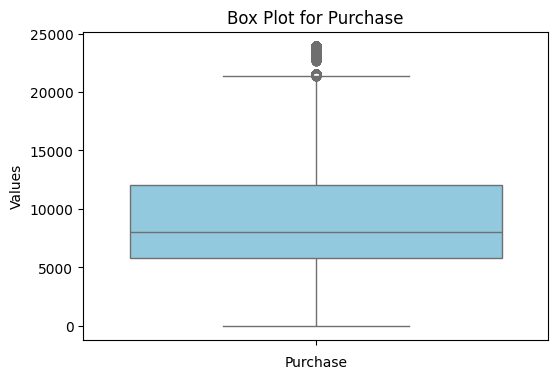

In [31]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

In [32]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [33]:
q1 = np.percentile(df['Purchase'],25)
q3 = np.percentile(df['Purchase'],75)
print(f'q1: {q1}')
print(f'q3: {q3}')
# To find upper bound and lower bound we need to find IQR ( inter quartile range)
IQR = q3-q1
print(f'IQR: {IQR}')

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(f'Upper Bound = {upper_bound}')
print(f'Lower Bound = {lower_bound}')
# median:
print('Median =',df['Purchase'].median())

q1: 5823.0
q3: 12054.0
IQR: 6231.0
Upper Bound = 21400.5
Lower Bound = -3523.5
Median = 8047.0


In [36]:
(len(df.loc[df['Purchase']>upper_bound]) / len(df))*100

0.4866671029763593

Infernce:

* As we see there are outliers in the 'Purchase' column.
* All values greater than upper bound (21400.5) are outliers in 'Purchase' column.

* Roughly 0.48% of the values in the 'Purchase' column exhibit outlier behavior.
* However, we have opted not to remove these outliers, as they could potentially yield valuable insights and prove useful for conducting sample analysis.

## Univariate analysis:
> ## Distribution of gender among Walmart customers

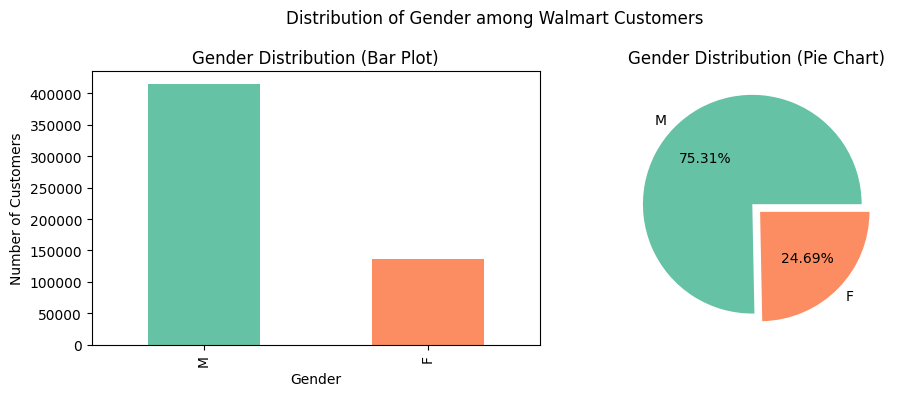

In [56]:
# Distribution of Age-Groups among the customers
plt.figure(figsize=(10, 4))

# Define a consistent color palette
colors = sns.color_palette('Set2')

# Bar plot for Age-Groups distribution
plt.subplot(121)
gender_counts = df['Gender'].value_counts()  # Store the value counts for reuse
gender_counts.plot(kind='bar', color=colors[:len(gender_counts)])  # Use the same colors
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution (Bar Plot)')

# Pie chart for Age-Groups distribution
plt.subplot(122)
plt.pie(
    gender_counts, 
    labels=gender_counts.index,
    explode=[0.05] * len(gender_counts),  # Dynamically set the explode values
    colors=colors[:len(gender_counts)],  # Use the same colors
    autopct='%.2f%%'
)
plt.title('Gender Distribution (Pie Chart)')

plt.suptitle('Distribution of Gender among Walmart Customers')
plt.tight_layout()
plt.show()


> ### Distribution of Martial-Status among Walmart customers

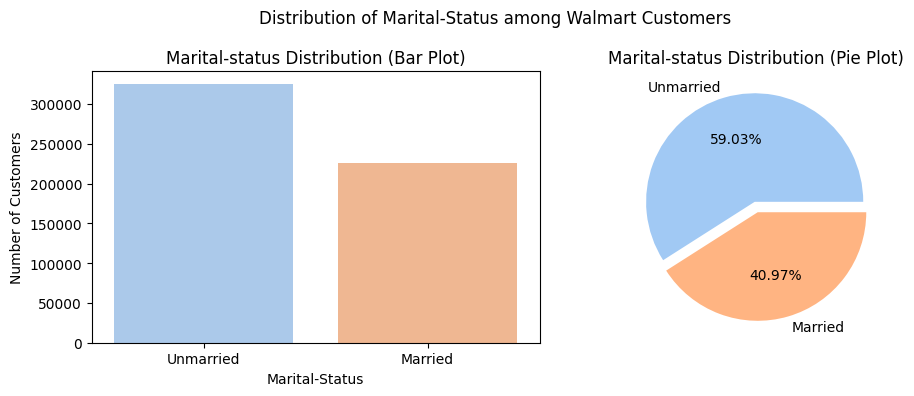

In [57]:
# Distribution of gender among the customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = 'Marital_Status', palette=sns.color_palette('pastel'))
plt.xlabel('Marital-Status')
plt.ylabel('Number of Customers')
plt.title('Marital-status Distribution (Bar Plot)')

plt.subplot(122)
plt.pie(df['Marital_Status'].value_counts(), labels = df['Marital_Status'].value_counts().index,
        explode= (0.05,0.05),
        colors=sns.color_palette('pastel'), 
        autopct='%.2f%%')
plt.title('Marital-status Distribution (Pie Plot)')

plt.suptitle('Distribution of Marital-Status among Walmart Customers')
plt.tight_layout()
plt.show()

> ## Distribution of Age-group across the Walmart customers:

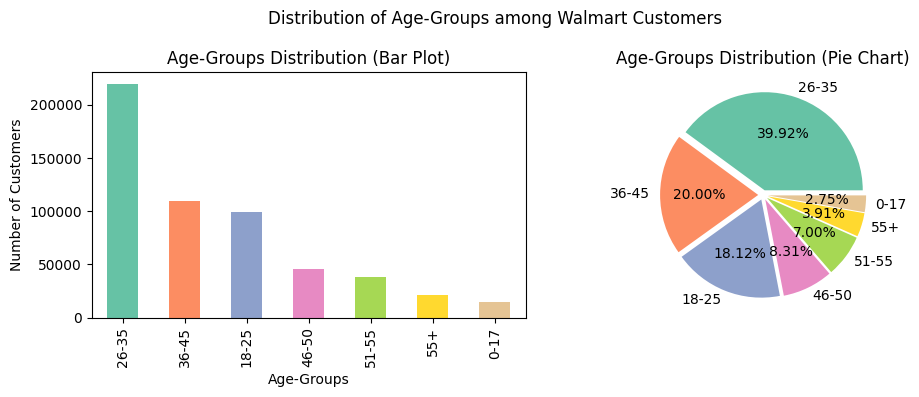

In [55]:
# Distribution of Age-Groups among the customers
plt.figure(figsize=(10, 4))

# Define a consistent color palette
colors = sns.color_palette('Set2')

# Bar plot for Age-Groups distribution
plt.subplot(121)
age_counts = df['Age'].value_counts()  # Store the value counts for reuse
age_counts.plot(kind='bar', color=colors[:len(age_counts)])  # Use the same colors
plt.xlabel('Age-Groups')
plt.ylabel('Number of Customers')
plt.title('Age-Groups Distribution (Bar Plot)')

# Pie chart for Age-Groups distribution
plt.subplot(122)
plt.pie(
    age_counts, 
    labels=age_counts.index,
    explode=[0.05] * len(age_counts),  # Dynamically set the explode values
    colors=colors[:len(age_counts)],  # Use the same colors
    autopct='%.2f%%'
)
plt.title('Age-Groups Distribution (Pie Chart)')

plt.suptitle('Distribution of Age-Groups among Walmart Customers')
plt.tight_layout()
plt.show()


> ### Distribution of Walmart customers across Product_Category,Occupation,City_Category,Stay_In_Current_City_Years

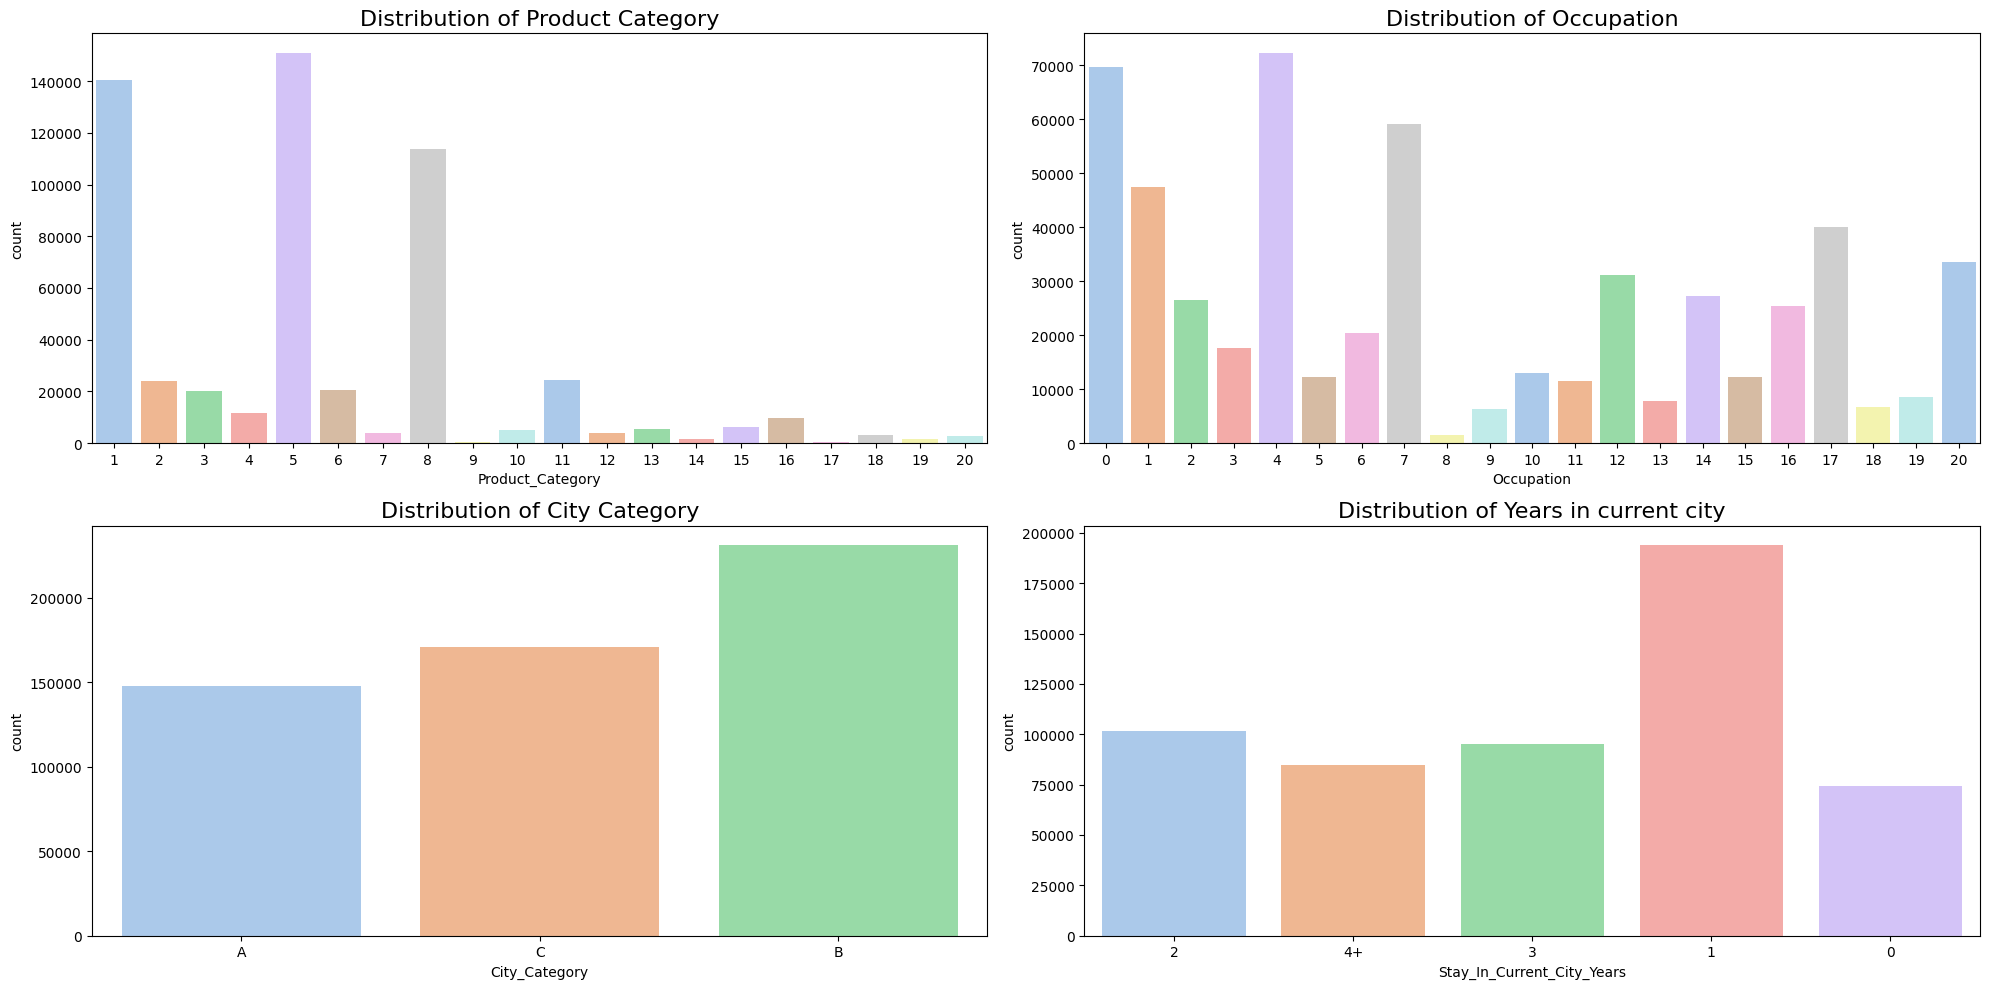

In [61]:
plt.figure(figsize=(20,10))

#count plot for product category
plt.subplot(221)
sns.countplot(data=df,x='Product_Category',palette='pastel')
plt.title('Distribution of Product Category',fontsize=16)

#count plot for Occupation
plt.subplot(222)
sns.countplot(data=df,x='Occupation',palette='pastel')
plt.title('Distribution of Occupation',fontsize=16)

#countplot for city category
plt.subplot(223)
sns.countplot(data=df,x='City_Category',palette='pastel')
plt.title('Distribution of City Category',fontsize=16)

#countplot for years in current city
plt.subplot(224)
sns.countplot(data=df,x='Stay_In_Current_City_Years',palette='pastel')
plt.title('Distribution of Years in current city',fontsize=16)

plt.tight_layout()
plt.show()

> ### Distribution of Purchase across Walmart Customers

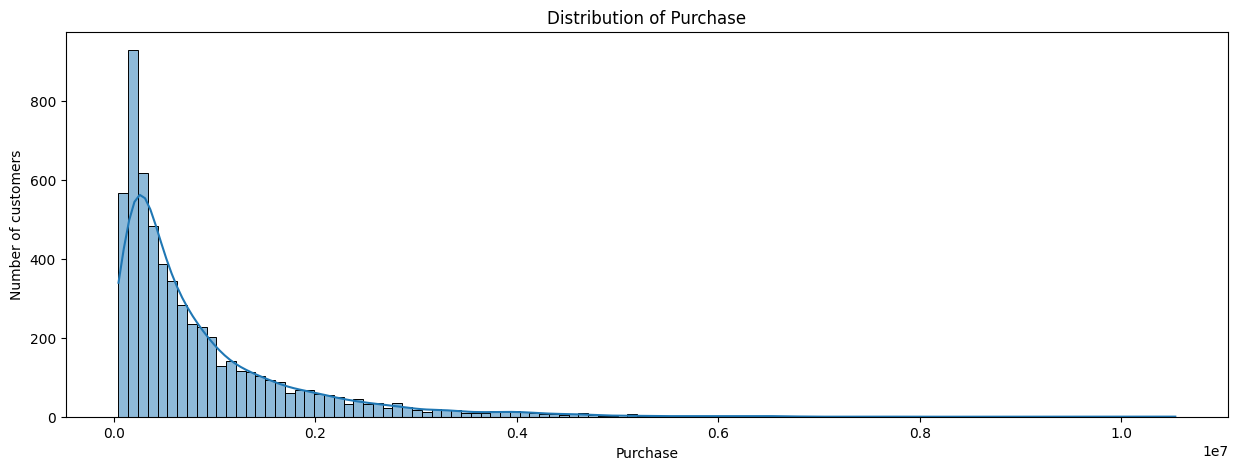

In [63]:
purchase_df=df.groupby(['User_ID']).agg(purchase_sum=('Purchase','sum')).reset_index()
plt.figure(figsize=(15,5))
sns.histplot(data=purchase_df,x='purchase_sum',kde=True)
plt.xlabel('Purchase')
plt.ylabel('Number of customers')
plt.title('Distribution of Purchase')
plt.show()

## Bivariate Analysis:

> ### Distribution of Purchase across Gender

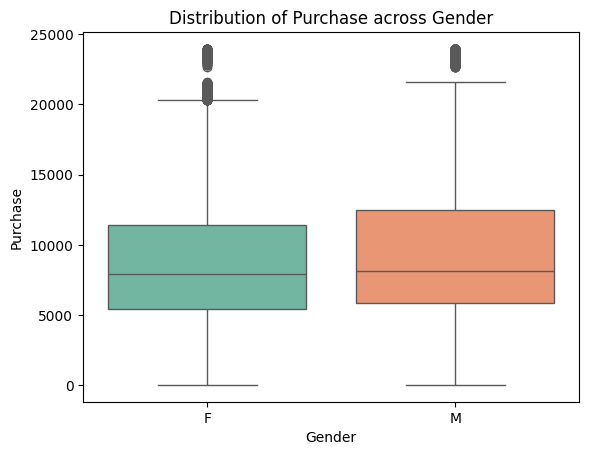

In [73]:
#gender_colors = {'Male': 'lightblue', 'Female': 'pink'}

sns.boxplot(data=df,x='Gender',y='Purchase',palette=sns.color_palette('Set2'))
plt.title("Distribution of Purchase across Gender")
plt.show()

In [68]:
q1_male=np.percentile(df[df['Gender']=='M']['Purchase'],25)
q3_male=np.percentile(df[df['Gender']=='M']['Purchase'],75)
median_male=np.percentile(df[df['Gender']=='M']['Purchase'],50)
q1_female=np.percentile(df[df['Gender']=='F']['Purchase'],25)
q3_female=np.percentile(df[df['Gender']=='F']['Purchase'],75)
median_female=np.percentile(df[df['Gender']=='F']['Purchase'],50)
print(f'Inter Quartile Range for male customers :{q1_male}-{q3_male}')
print(f'Median purchases for male customers: {median_male}')
print(f'Inter Quartile Range for female customer:{q1_female}-{q3_female}')
print(f'Median purchases for female customers: {median_female}')

Inter Quartile Range for male customers :5863.0-12454.0
Median purchases for male customers: 8098.0
Inter Quartile Range for female customer:5433.0-11400.0
Median purchases for female customers: 7914.0


**Inference**

* Male customers spend more money per transaction than female customers.
* Inter Quartile Range for male customers :5863.0-12454.0
* Median purchases for male customers: 8098.0
* Inter Quartile Range for female customer:5433.0-11400.0
* Median purchases for female customers: 7914.0

> ### Distribution of Purchase across Martial Status¶

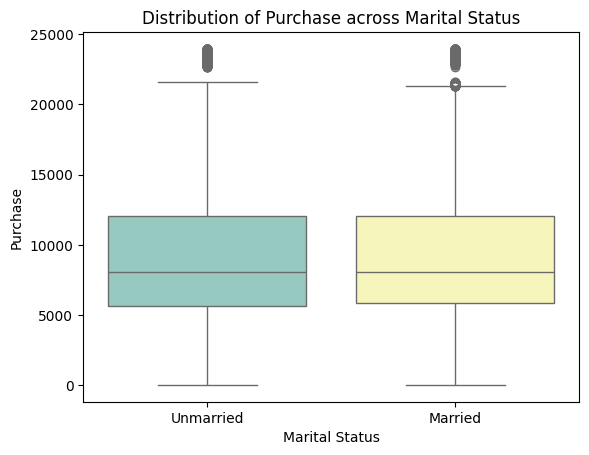

In [72]:
sns.boxplot(data=df,x='Marital_Status',y='Purchase',palette=sns.color_palette('Set3'))
plt.title("Distribution of Purchase across Marital Status")
plt.xlabel('Marital Status')
plt.show()

In [74]:
q1_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],25)
q3_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],75)
median_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],50)
q1_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],25)
q3_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],75)
median_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],50)
print(f'Inter Quartile Range for married customers :{q1_married}-{q3_married}')
print(f'Median purchases for married customers: {median_married}')
print(f'Inter Quartile unmarried for unmarried customer:{q1_unmarried}-{q3_unmarried}')
print(f'Median purchases for unmarried customers: {median_unmarried}')

Inter Quartile Range for married customers :5843.0-12042.0
Median purchases for married customers: 8051.0
Inter Quartile unmarried for unmarried customer:5605.0-12061.0
Median purchases for unmarried customers: 8044.0


**Inference:**

The spending behavior of both married and unmarried customers is consistent, as they both spend nearly the same amount per transaction. This is notably evident from the boxplot analysis, where the interquartile range and median purchases for both groups remain identical.

> ### Distribution of Purchase across Age

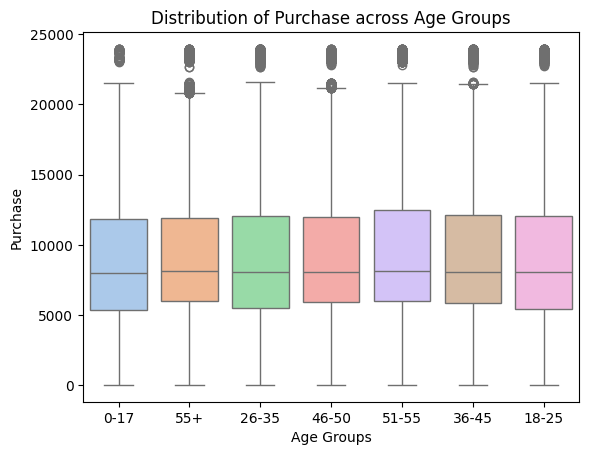

In [75]:
sns.boxplot(data=df,x='Age',y='Purchase',palette='pastel')
plt.title("Distribution of Purchase across Age Groups")
plt.xlabel('Age Groups')
plt.show()

**Inference:** 
* Across each age group, customers exhibit a comparable spending pattern per transaction. The spending behavior remains remarkably consistent within each age category.

> ### Distribution of Purchase across Product_Category,Occupation,City_Category,Stay_In_Current_City_Years

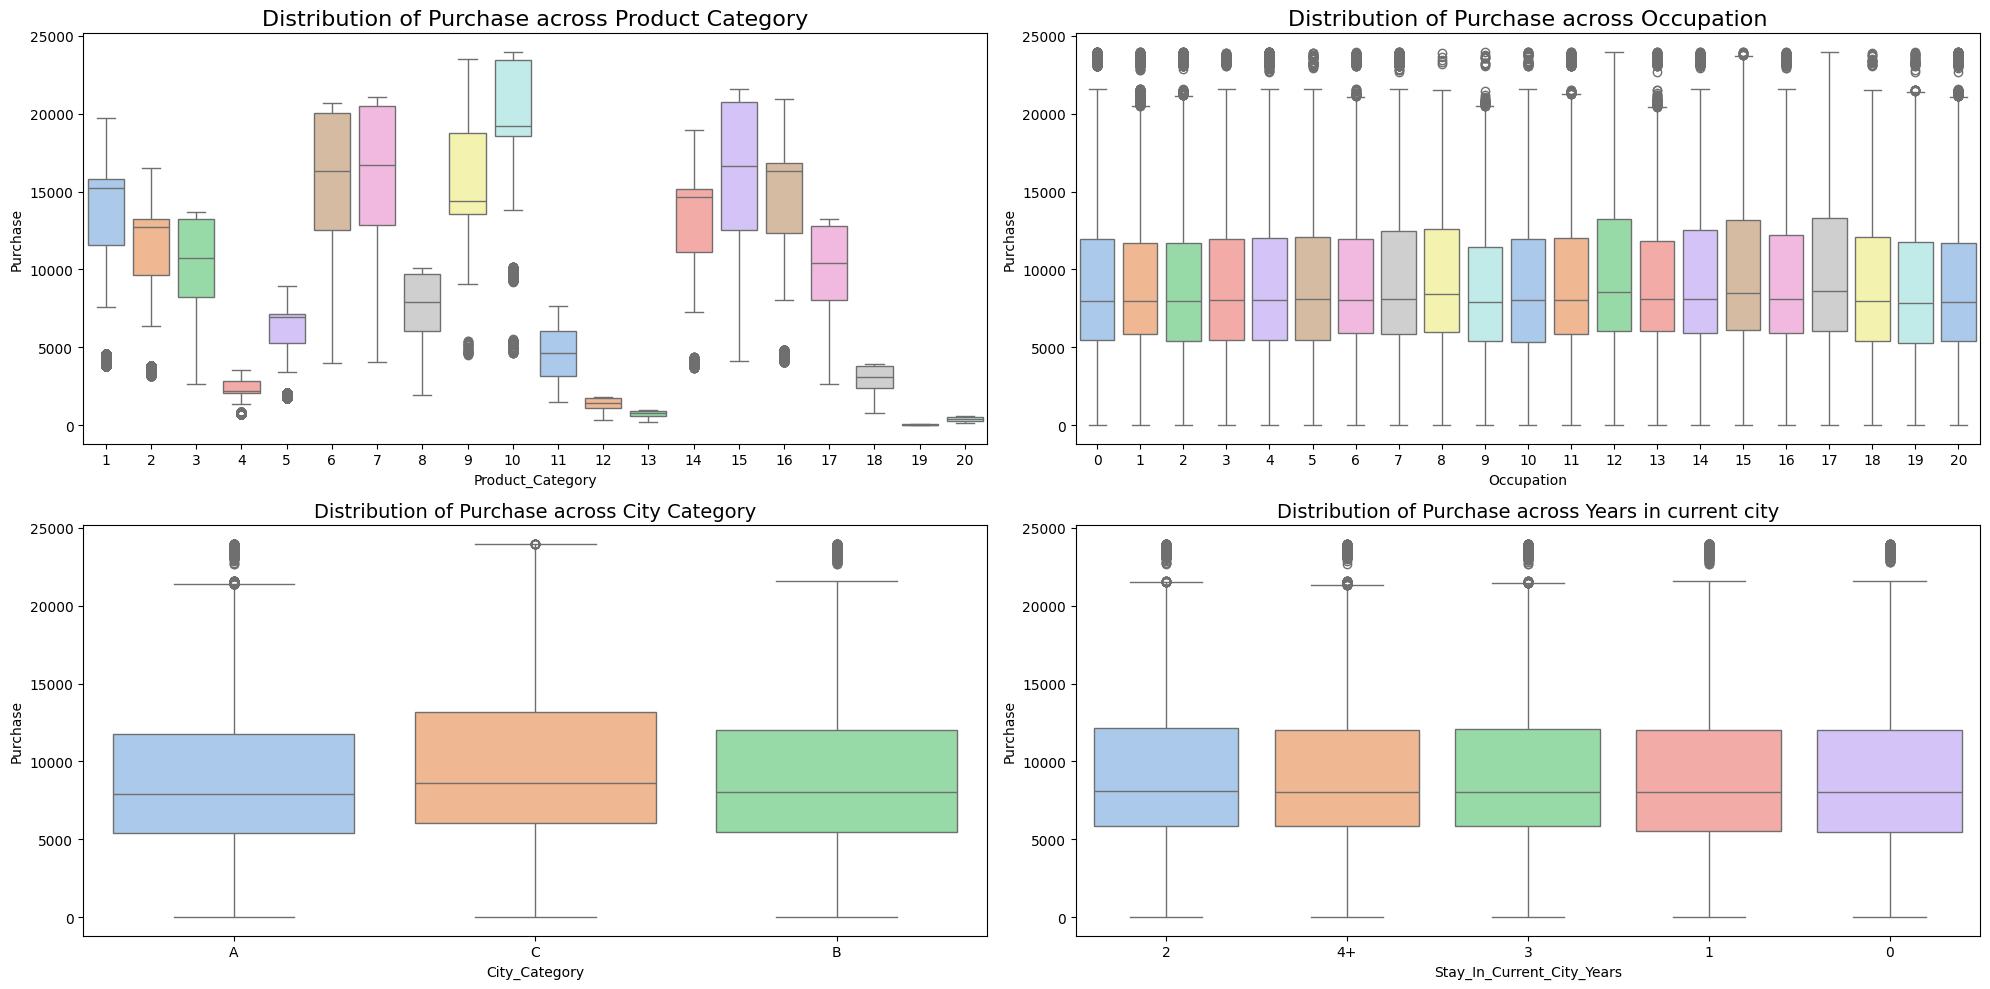

In [77]:
# sns.set_style('darkgrid')
plt.figure(figsize=(20,10))

#Box plot for product category
plt.subplot(221)
sns.boxplot(data=df,x='Product_Category',y='Purchase',palette='pastel')
plt.title('Distribution of Purchase across Product Category',fontsize=16)

#Box plot for Occupation
plt.subplot(222)
sns.boxplot(data=df,x='Occupation',y='Purchase',palette='pastel')
plt.title('Distribution of Purchase across Occupation',fontsize=16)

#Boxplot for city category
plt.subplot(223)
sns.boxplot(data=df,x='City_Category',y='Purchase',palette='pastel')
plt.title('Distribution of Purchase across City Category',fontsize=14)

#Boxplot for years in current city
plt.subplot(224)
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',palette='pastel')
plt.title('Distribution of Purchase across Years in current city',fontsize=14)

plt.tight_layout()
plt.show()

**Insight:**

* Within Walmart, product categories 13, 19, and 20 record the lowest spending per transaction among customers.
* Among Walmart customers, product categories 6, 7, and 15 stand out as the most favored, evidenced by their higher spending per transaction.
* Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.

## Heatmap :

In [91]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


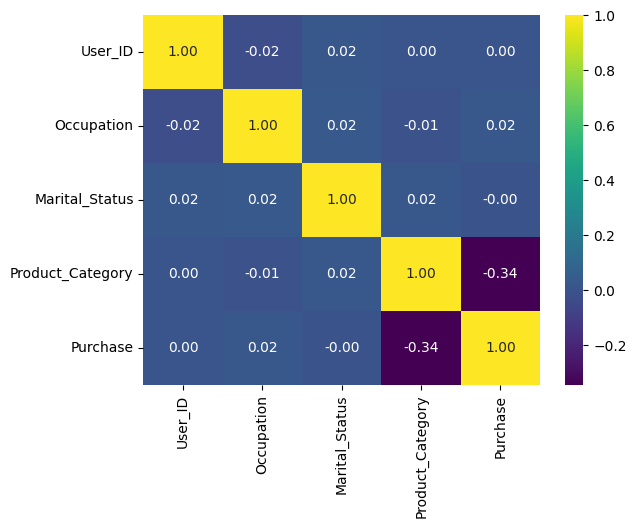

In [92]:
sns.heatmap(data[['User_ID','Occupation','Marital_Status' ,'Product_Category',
       'Purchase']].corr(),annot=True,cmap='viridis',fmt='.2f')
plt.show()

# Sample Analysis Using Central Limit Theorem and Confidence Interval

## CLT and CI analysis for Gender:
> ## CLT and CI analysis for Male customers

In [93]:
# Creating a Samples of size 1000 and computing means through bootstraping
male_df=df.loc[df['Gender']=='M']['Purchase']
male_df.mean()

9437.526040472265

In [94]:
male_purchase_mean_1000 = []
for i in range(10000):
    bootstraped_sample = np.random.choice(male_df, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    male_purchase_mean_1000.append(bootstraped_mean)

* Calculating CI at 90%,95% and 99% for sample of size 1000

In [95]:
CI_male_90_1000 = np.percentile(male_purchase_mean_1000,[5,95])
CI_male_95_1000 = np.percentile(male_purchase_mean_1000,[2.5,97.5])
CI_male_99_1000 = np.percentile(male_purchase_mean_1000,[0.5,99.5])
# confidence Interval:
print(f'CI at 90% for sample of size 1000: {np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9169.7 - 9698.53
CI at 95% for sample of size 1000: 9123.43 - 9752.97
CI at 99% for sample of size 1000: 9033.84 - 9849.65


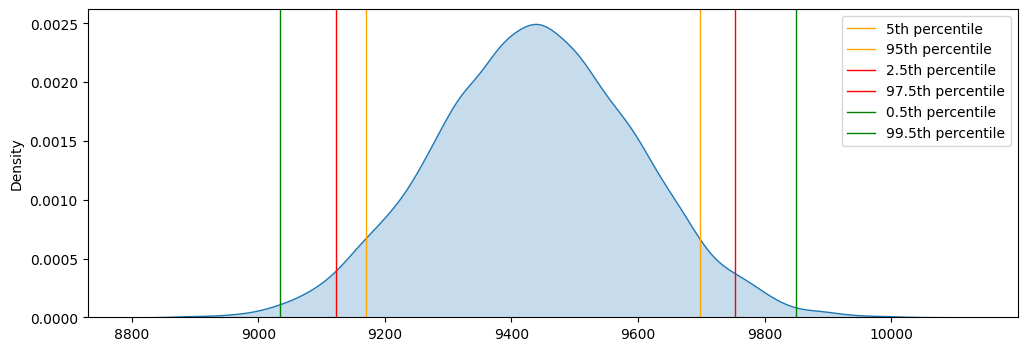

In [214]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))

sns.kdeplot(male_purchase_mean_1000,fill = True)
plt.axvline(x = np.percentile(male_purchase_mean_1000,[5]), ymin = 0, ymax = 1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[95]), ymin = 0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')

plt.axvline(x=np.percentile(male_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')

plt.axvline(x=np.percentile(male_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

* Repeating the analysis for different sample of size 2500 and 5000:

In [103]:
# Bootstraping means for sample of size 2500
male_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample = np.random.choice(male_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_2500.append(bootstraped_mean)
    
# Bootstraping means for sample of size 5000
male_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_5000.append(bootstraped_mean)

In [107]:
CI_male_90_2500=np.percentile(male_purchase_mean_2500,[5,95])
CI_male_95_2500=np.percentile(male_purchase_mean_2500,[2.5,97.5])
CI_male_99_2500=np.percentile(male_purchase_mean_2500,[0.5,99.5])

print(f'CI at 90% for sample of size 2500: {np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}')

print()

CI_male_90_5000 = np.percentile(male_purchase_mean_5000,[5,95])
CI_male_95_5000 = np.percentile(male_purchase_mean_5000,[2.5,97.5])
CI_male_99_5000=np.percentile(male_purchase_mean_5000,[0.5,99.5])

print(f'CI at 90% for sample of size 5000: {np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9268.62 - 9605.64
CI at 95% for sample of size 2500: 9235.8 - 9640.37
CI at 99% for sample of size 2500: 9181.65 - 9704.08

CI at 90% for sample of size 5000: 9315.47 - 9554.94
CI at 95% for sample of size 5000: 9291.7 - 9578.01
CI at 99% for sample of size 5000: 9252.48 - 9625.06


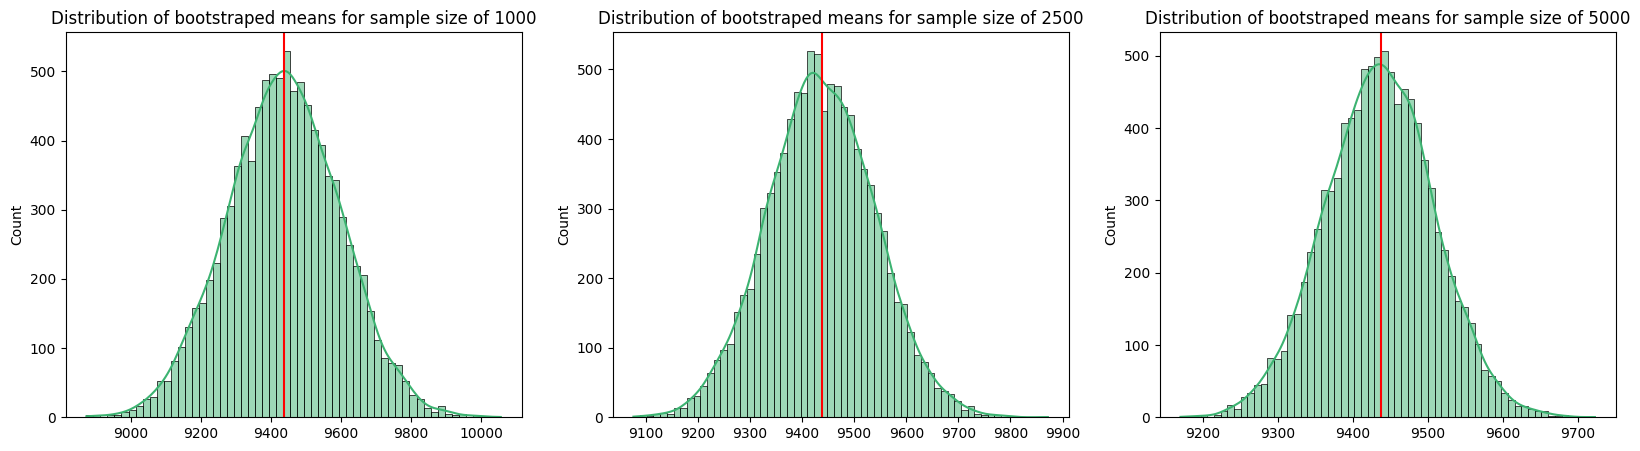

In [112]:
# Visualising bootstraped means through histogram in order to check that it follows normal distribution:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.histplot(male_purchase_mean_1000, kde = True,color ='mediumseagreen')
plt.axvline(male_df.mean(), color='red', linestyle='-', linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(132)
sns.histplot(male_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(133)
sns.histplot(male_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

In [113]:
# Calculating the standard error for sample sizes of 1000, 2500, and 5000.
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

std_male_1000 = (male_df.std()/np.sqrt(1000))
std_male_2500 = (male_df.std()/np.sqrt(2500))
std_male_5000 = (male_df.std()/np.sqrt(5000))

print(f'Standard error for sample size of 1000: {np.round(std_male_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(std_male_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(std_male_5000,2)}')

Standard error for sample size of 1000: 161.03
Standard error for sample size of 2500: 101.84
Standard error for sample size of 5000: 72.01


In [114]:
# Standard error using bootstraping

print(f'Standard error for sample size of 1000: {np.round(pd.Series(male_purchase_mean_1000).std(),2)}')
print(f'Standard error for sample size of 2500: {np.round(pd.Series(male_purchase_mean_2500).std(),2)}')
print(f'Standard error for sample size of 5000: {np.round(pd.Series(male_purchase_mean_5000).std(),2)}')

Standard error for sample size of 1000: 160.56
Standard error for sample size of 2500: 102.67
Standard error for sample size of 5000: 72.56


### Visualising all analysis using a table:

In [116]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
              
             'Standard Error':[std_male_1000,std_male_2500,std_male_5000],
            
              'CI_90':[f'{np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}',
                     f'{np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}',
                     f'{np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}'],
             
              'CI_95':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             
              'CI_99':[f'{np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}',
                     f'{np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}',
                     f'{np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,161.029067,9169.7 - 9698.53,9123.43 - 9752.97,9033.84 - 9849.65
1,2500,101.843724,9268.62 - 9605.64,9235.8 - 9640.37,9181.65 - 9704.08
2,5000,72.014388,9315.47 - 9554.94,9291.7 - 9578.01,9252.48 - 9625.06


**Inference:**

* As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
* The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

> ## CLT and CI analysis for Female customers:

In [117]:
female_df=df.loc[df['Gender']=='F']['Purchase']
female_df.mean()

8734.565765155476

In [118]:
female_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_1000.append(bootstraped_mean)

In [119]:
# Calculating CI at 90%,95% and 99% for sample of size 1000

CI_female_90_1000=np.percentile(female_purchase_mean_1000,[5,95])
CI_female_95_1000=np.percentile(female_purchase_mean_1000,[2.5,97.5])
CI_female_99_1000=np.percentile(female_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8487.56 - 8987.29
CI at 95% for sample of size 1000: 8437.2 - 9033.17
CI at 99% for sample of size 1000: 8340.48 - 9127.37


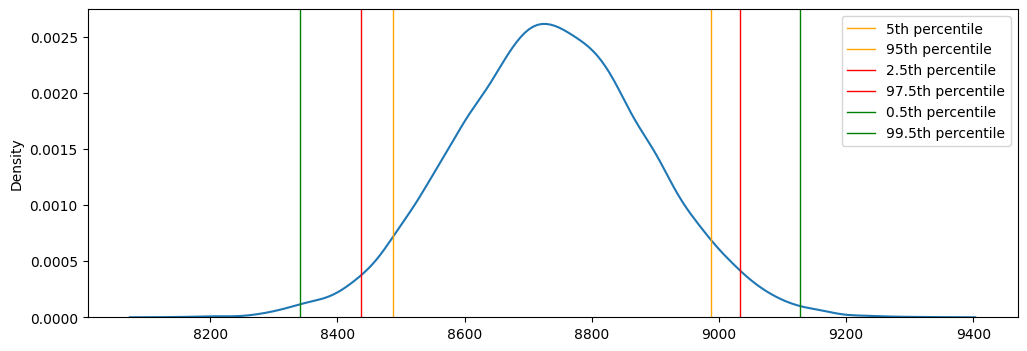

In [122]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(female_purchase_mean_1000)
plt.axvline(x=np.percentile(female_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')

plt.axvline(x=np.percentile(female_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')

plt.axvline(x=np.percentile(female_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

In [123]:
# Repeating the analysis for sample of sizes 2500 and 5000:
# Bootstraping means for sample of size 2500
female_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_2500.append(bootstraped_mean)
    
# Bootstraping means for sample of size 5000
female_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_5000.append(bootstraped_mean)

In [125]:
CI_female_90_2500=np.percentile(female_purchase_mean_2500,[5,95])
CI_female_95_2500=np.percentile(female_purchase_mean_2500,[2.5,97.5])
CI_female_99_2500=np.percentile(female_purchase_mean_2500,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}')
print()
CI_female_90_5000=np.percentile(female_purchase_mean_5000,[5,95])
CI_female_95_5000=np.percentile(female_purchase_mean_5000,[2.5,97.5])
CI_female_99_5000=np.percentile(female_purchase_mean_5000,[0.5,99.5])

print(f'CI at 90% for sample of size 5000: {np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}')

CI at 90% for sample of size 2500: 8572.95 - 8892.16
CI at 95% for sample of size 2500: 8541.82 - 8921.59
CI at 99% for sample of size 2500: 8492.36 - 8976.71

CI at 90% for sample of size 5000: 8623.03 - 8845.26
CI at 95% for sample of size 5000: 8601.09 - 8867.35
CI at 99% for sample of size 5000: 8560.43 - 8908.14


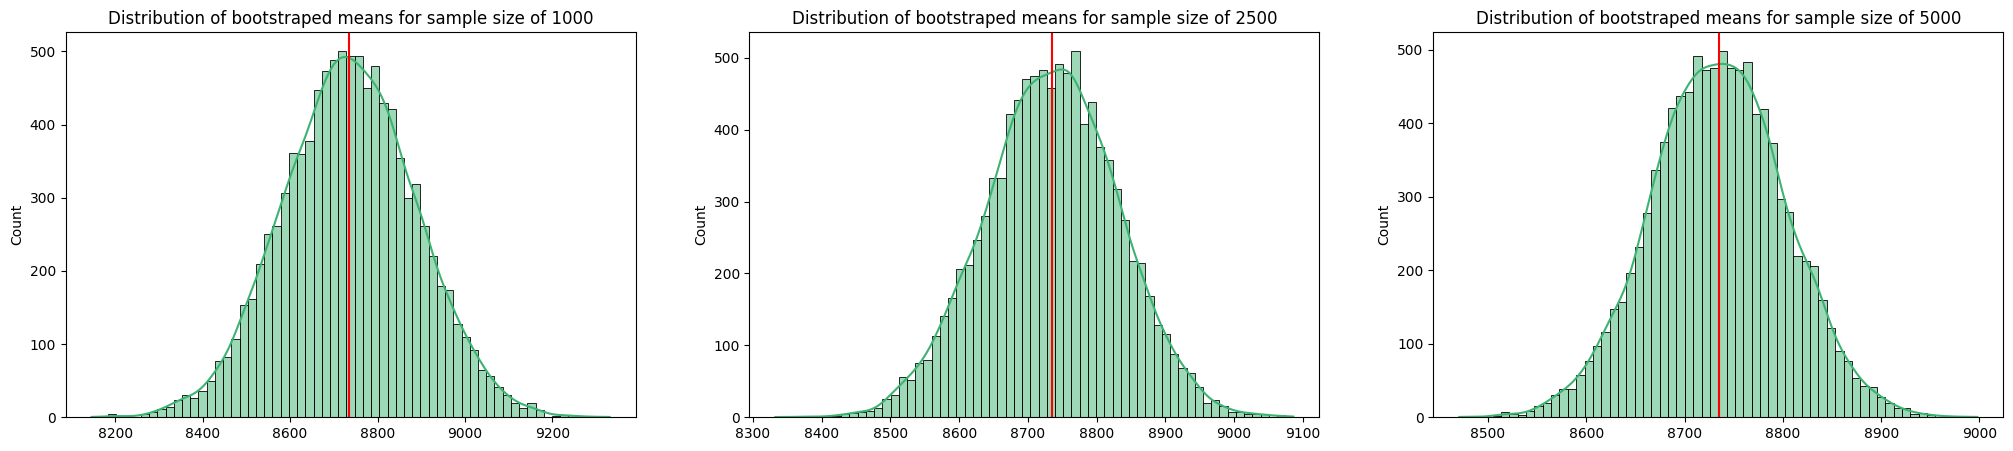

In [126]:
# Visualising bootstraped means through histogram in order to check that it follows normal distribution

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(female_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(female_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(female_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

In [127]:
# Calculating the standard error for sample sizes of 1000, 2500, and 5000.
std_female_1000 = (female_df.std()/np.sqrt(1000))
std_female_2500 = (female_df.std()/np.sqrt(2500))
std_female_5000 = (female_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(std_female_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(std_female_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(std_female_5000,2)}')

Standard error for sample size of 1000: 150.75
Standard error for sample size of 2500: 95.34
Standard error for sample size of 5000: 67.42


In [129]:
#Visualising all analysis using a table

pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[std_female_1000,std_female_2500,std_female_5000],
            'CI_90':[f'{np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}',
                     f'{np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}',
                     f'{np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}',
                     f'{np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}',
                     f'{np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,150.753153,8487.56 - 8987.29,8437.2 - 9033.17,8340.48 - 9127.37
1,2500,95.344666,8572.95 - 8892.16,8541.82 - 8921.59,8492.36 - 8976.71
2,5000,67.418860,8623.03 - 8845.26,8601.09 - 8867.35,8560.43 - 8908.14


In [131]:
# Comparing CI at 95% for female and male customers for sample sizes of 1000,2500 and 5000

pd.DataFrame({'Sample Size':[1000,2500,5000],
    
             'CI_95_male':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
              
             'CI_95_female':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}']})


,Sample Size,CI_95_male,CI_95_female
0,1000,9123.43 - 9752.97,8437.2 - 9033.17
1,2500,9235.8 - 9640.37,8541.82 - 8921.59
2,5000,9291.7 - 9578.01,8601.09 - 8867.35


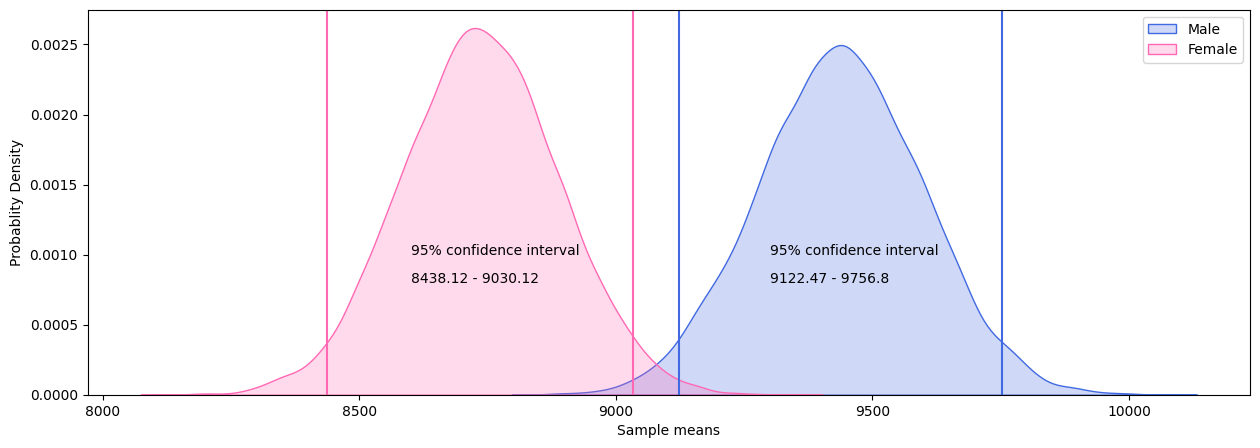

In [140]:
# Comparing CI for male and Female customers at 95% using KDE plot

plt.figure(figsize=(15,5))

sns.kdeplot(male_purchase_mean_1000,color='royalblue', fill=True,label='Male')
sns.kdeplot(female_purchase_mean_1000,color='hotpink', fill=True,label='Female')

plt.axvline(np.percentile(male_purchase_mean_1000,[2.5]),0,1,color='royalblue')
plt.axvline(np.percentile(male_purchase_mean_1000,[97.5]),0,1,color='royalblue')

plt.axvline(np.percentile(female_purchase_mean_1000,[2.5]),0,1,color='hotpink')
plt.axvline(np.percentile(female_purchase_mean_1000,[97.5]),0,1,color='hotpink')

plt.annotate('95% confidence interval',xy=(9300,0.0010),size=10)
plt.annotate('9122.47 - 9756.8',xy=(9300,0.0008),size=10)

plt.annotate('95% confidence interval',xy=(8600,0.0010),size=10)
plt.annotate('8438.12 - 9030.12',xy=(8600,0.0008),size=10)

plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

**Inference:**

* Confidence intervals at 95 % for male and female customers does not overlap.
* With a 95% confidence level, the confidence interval for male customers is consistently both higher and wider than the confidence interval for female customers for a sample size of 1000.
* This statistically indicates that male customers tend to spend more money per transaction than female customers.

## CI and CLT analysis for Marital Status
> ### CI and CLT analysis for Married Customers

In [141]:
#Creating a Samples of size 1000 and computing means through bootstraping

married_df = df.loc[df['Marital_Status']=='Married']['Purchase']
married_df.mean()

9261.174574082374

In [145]:
married_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample= np.random.choice(married_df,size=1000)
    bootstraped_mean= np.mean(bootstraped_sample)
    married_purchase_mean_1000.append(bootstraped_mean)

print(married_purchase_mean_1000[:10])

[9263.785, 9308.366, 9363.541, 9358.507, 9203.506, 9124.112, 8946.583, 9150.678, 9664.123, 9014.368]


In [150]:
CI_married_90_1000=np.percentile(married_purchase_mean_1000,[5,95])
CI_married_95_1000=np.percentile(married_purchase_mean_1000,[2.5,97.5])
CI_married_99_1000=np.percentile(married_purchase_mean_1000,[0.5,99.5])

print(f'CI at 90% for sample of size 1000: {np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8998.83 - 9524.03
CI at 95% for sample of size 1000: 8950.26 - 9577.67
CI at 99% for sample of size 1000: 8863.1 - 9673.85


In [151]:
#np.percentile(married_purchase_mean_1000,[5,95])

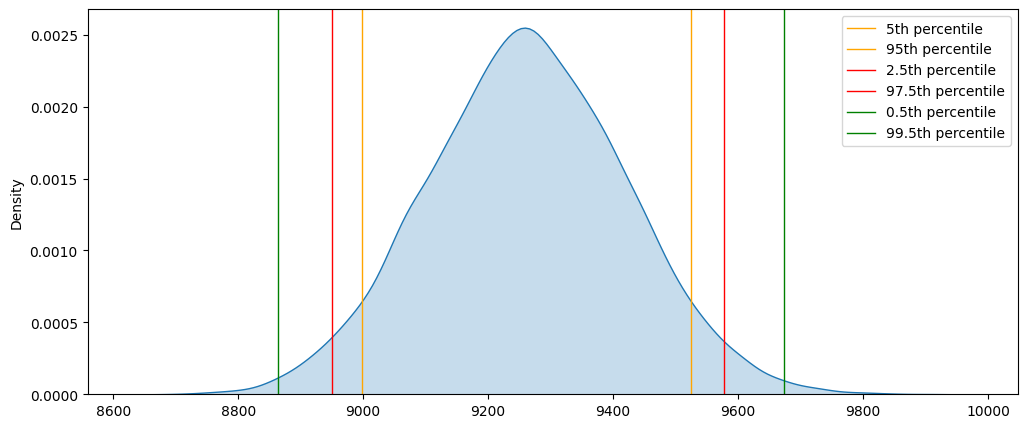

In [153]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(married_purchase_mean_1000,fill = True)
plt.axvline(x=np.percentile(married_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')

plt.axvline(x=np.percentile(married_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')

plt.axvline(x=np.percentile(married_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

In [154]:
# Repeating Analysis for sample of sizes 2500 and 5000:
# Bootstraping means for sample of size 2500
married_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_2500.append(bootstraped_mean)
    
# Bootstraping means for sample of size 5000
married_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_5000.append(bootstraped_mean)

In [155]:
CI_married_90_2500=np.percentile(married_purchase_mean_2500,[5,95])
CI_married_95_2500=np.percentile(married_purchase_mean_2500,[2.5,97.5])
CI_married_99_2500=np.percentile(married_purchase_mean_2500,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}')
print()

CI_married_90_5000=np.percentile(married_purchase_mean_5000,[5,95])
CI_married_95_5000=np.percentile(married_purchase_mean_5000,[2.5,97.5])
CI_married_99_5000=np.percentile(married_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 5000: {np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9098.12 - 9426.16
CI at 95% for sample of size 2500: 9069.52 - 9457.82
CI at 99% for sample of size 2500: 9006.5 - 9510.95

CI at 90% for sample of size 5000: 9145.09 - 9379.46
CI at 95% for sample of size 5000: 9121.07 - 9402.03
CI at 99% for sample of size 5000: 9074.1 - 9445.12


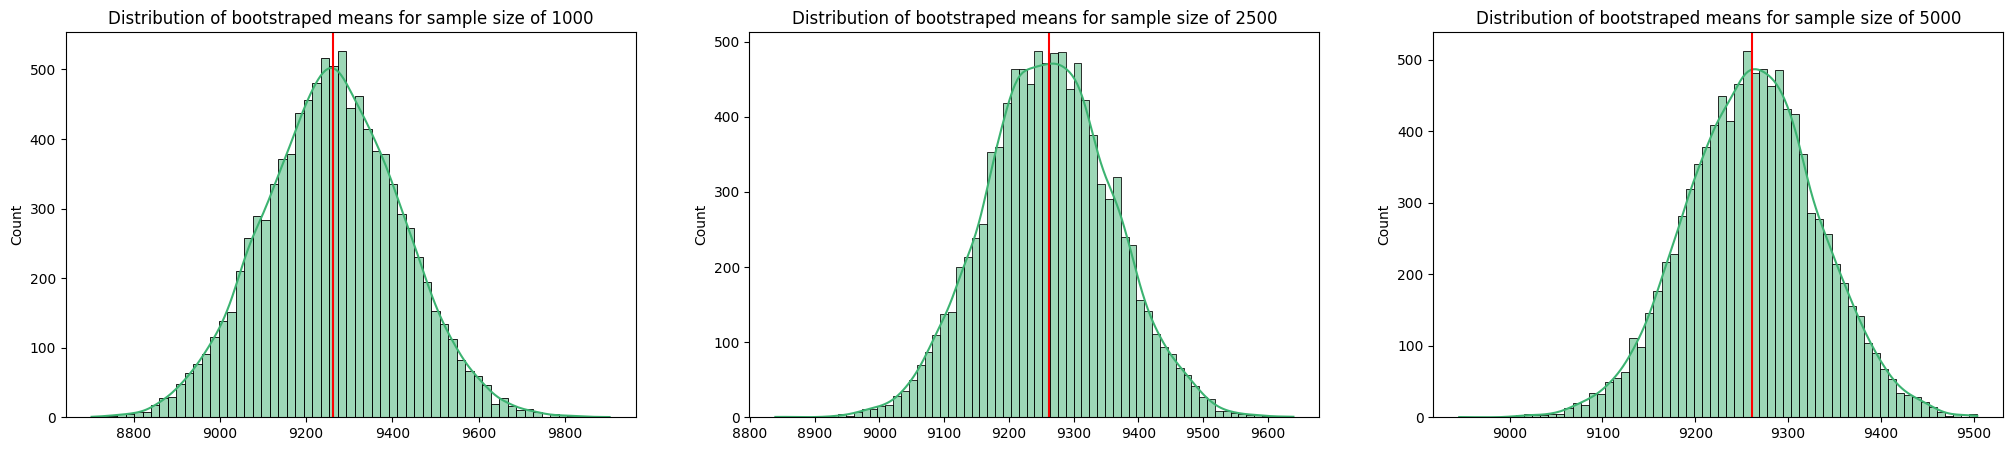

In [157]:
#visualising bootstraped means through histogram in order to check that it follows normal distribution

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(married_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(married_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(married_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

In [158]:
#Calculating the standard error for sample sizes of 1000, 2500, and 5000

# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_married_1000 = (married_df.std()/np.sqrt(1000))
SE_married_2500 = (married_df.std()/np.sqrt(2500))
SE_married_5000 = (married_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_married_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_married_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_married_5000,2)}')

Standard error for sample size of 1000: 158.65
Standard error for sample size of 2500: 100.34
Standard error for sample size of 5000: 70.95


In [160]:
#Visualising all analysis using a table

pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_married_1000,SE_married_2500,SE_married_5000],
            'CI_90':[f'{np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}',
                     f'{np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}',
                     f'{np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}',
                     f'{np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}',
                     f'{np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.648225,8998.83 - 9524.03,8950.26 - 9577.67,8863.1 - 9673.85
1,2500,100.337948,9098.12 - 9426.16,9069.52 - 9457.82,9006.5 - 9510.95
2,5000,70.949643,9145.09 - 9379.46,9121.07 - 9402.03,9074.1 - 9445.12


> ### CLT and CI analysis for Unmarried Customers

In [161]:
# Creating a Samples of size 1000 and computing means through bootstraping:
unmarried_df = df.loc[df.Marital_Status == 'Unmarried']['Purchase']
unmarried_df.mean()

9265.907618921507

In [162]:
unmarried_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_1000.append(bootstraped_mean)

In [163]:
CI_unmarried_90_1000=np.percentile(unmarried_purchase_mean_1000,[5,95])
CI_unmarried_95_1000=np.percentile(unmarried_purchase_mean_1000,[2.5,97.5])
CI_unmarried_99_1000=np.percentile(unmarried_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9004.82 - 9528.72
CI at 95% for sample of size 1000: 8959.16 - 9578.89
CI at 99% for sample of size 1000: 8870.67 - 9668.71


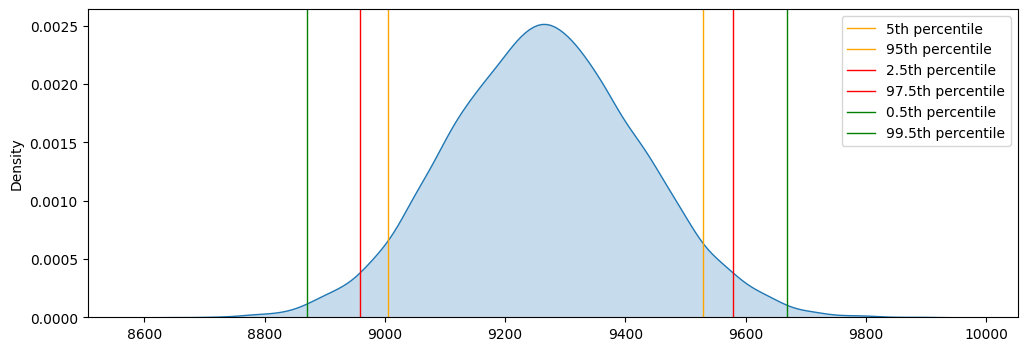

In [166]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(unmarried_purchase_mean_1000,fill = True)
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

In [167]:
# Repeating Analysis for sample of sizes 2500 and 5000

unmarried_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_2500.append(bootstraped_mean)
    
# Bootstraping means for sample of size 5000
unmarried_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_5000.append(bootstraped_mean)

In [168]:
CI_unmarried_90_2500=np.percentile(unmarried_purchase_mean_2500,[5,95])
CI_unmarried_95_2500=np.percentile(unmarried_purchase_mean_2500,[2.5,97.5])
CI_unmarried_99_2500=np.percentile(unmarried_purchase_mean_2500,[0.5,99.5])
CI_unmarried_90_5000=np.percentile(unmarried_purchase_mean_5000,[5,95])
CI_unmarried_95_5000=np.percentile(unmarried_purchase_mean_5000,[2.5,97.5])
CI_unmarried_99_5000=np.percentile(unmarried_purchase_mean_5000,[0.5,99.5])

print(f'CI at 90% for sample of size 2500: {np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}')
print()
print(f'CI at 90% for sample of size 5000: {np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9099.5 - 9431.41
CI at 95% for sample of size 2500: 9066.88 - 9464.33
CI at 99% for sample of size 2500: 9003.74 - 9522.09

CI at 90% for sample of size 5000: 9148.97 - 9381.11
CI at 95% for sample of size 5000: 9124.81 - 9405.33
CI at 99% for sample of size 5000: 9080.25 - 9448.57


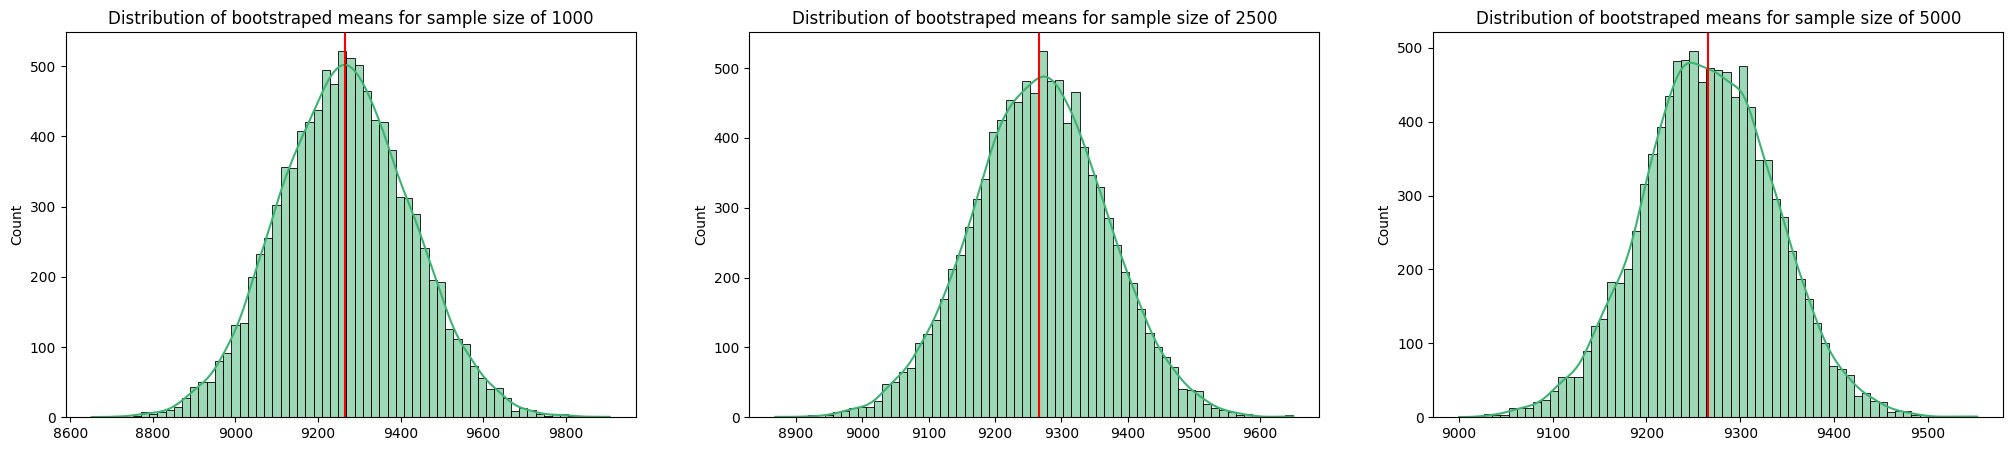

In [169]:
#Visualising bootstraped means through histogram in order to check that it follows normal distribution

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(unmarried_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(unmarried_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(unmarried_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()


In [170]:
# Calculating the standard error for sample sizes of 1000, 2500, and 5000

# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_unmarried_1000 = (unmarried_df.std()/np.sqrt(1000))
SE_unmarried_2500 = (unmarried_df.std()/np.sqrt(2500))
SE_unmarried_5000 = (unmarried_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_unmarried_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_unmarried_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_unmarried_5000,2)}')

Standard error for sample size of 1000: 158.98
Standard error for sample size of 2500: 100.55
Standard error for sample size of 5000: 71.1


In [172]:
# Visualising all analysis using a table

pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_unmarried_1000,SE_unmarried_2500,SE_unmarried_5000],
            'CI_90':[f'{np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}',
                     f'{np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}',
                     f'{np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}',
                     f'{np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}',
                     f'{np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.978698,9004.82 - 9528.72,8959.16 - 9578.89,8870.67 - 9668.71
1,2500,100.546957,9099.5 - 9431.41,9066.88 - 9464.33,9003.74 - 9522.09
2,5000,71.097435,9148.97 - 9381.11,9124.81 - 9405.33,9080.25 - 9448.57


### Comparing confidence interval for married and unmarried customers at 95% and sample size is 1000

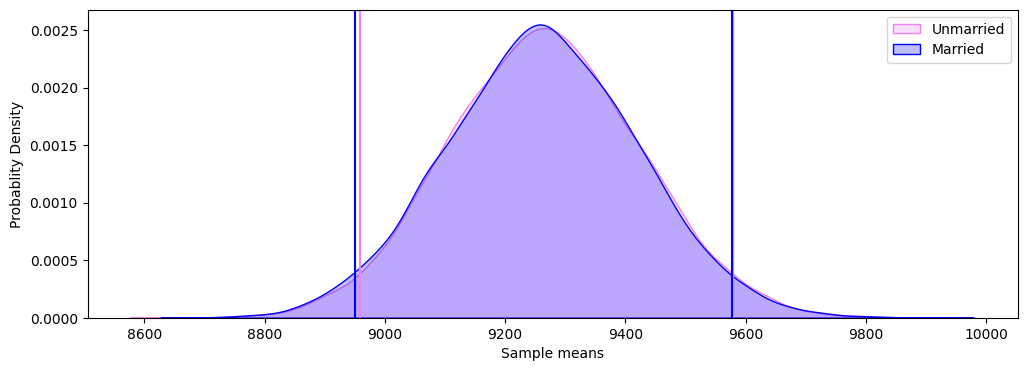

In [177]:
plt.figure(figsize=(12,4))

sns.kdeplot(unmarried_purchase_mean_1000,color='violet',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_1000,color='blue',fill=True,label='Married')

plt.axvline(np.percentile(unmarried_purchase_mean_1000,[2.5]),0,1,color='violet')
plt.axvline(np.percentile(unmarried_purchase_mean_1000,[97.5]),0,1,color='violet')

plt.axvline(np.percentile(married_purchase_mean_1000,[2.5]),0,1,color='blue')
plt.axvline(np.percentile(married_purchase_mean_1000,[97.5]),0,1,color='blue')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')

plt.legend()
plt.show()

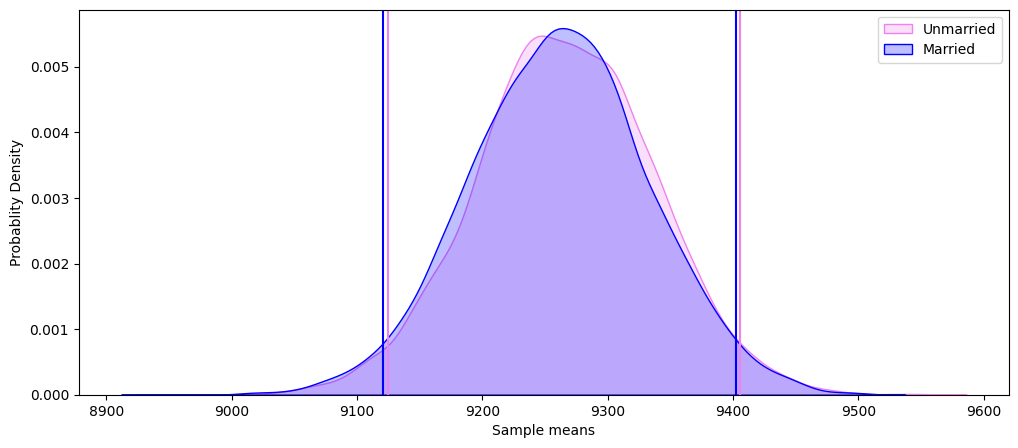

In [178]:
# Comparing confidence interval for married and unmarried customers at 95% and sample size is 5000

plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_5000,color='violet',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_5000,color='blue',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[2.5]),0,1,color='violet')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[97.5]),0,1,color='violet')
plt.axvline(np.percentile(married_purchase_mean_5000,[2.5]),0,1,color='blue')
plt.axvline(np.percentile(married_purchase_mean_5000,[97.5]),0,1,color='blue')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

In [179]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
    
             'CI_95_married':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_95_unmarried':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}']})

,Sample Size,CI_95_married,CI_95_unmarried
0,1000,8950.26 - 9577.67,8959.16 - 9578.89
1,2500,9069.52 - 9457.82,9066.88 - 9464.33
2,5000,9121.07 - 9402.03,9124.81 - 9405.33


## CI analysis for age-group¶
> ### CI analysis for 0-17 age-group¶

In [181]:
#Creating a Samples of size 1000 and computing means through bootstraping

youth_df=df.loc[df['Age']=='0-17']['Purchase']
youth_df.mean()

8933.464640444974

In [182]:
youth_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(youth_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    youth_purchase_mean.append(bootstraped_mean)

In [183]:
#Calculating CI at 90%,95% and 99% for sample of size 1000

CI_youth_90=np.percentile(youth_purchase_mean,[5,95])
CI_youth_95=np.percentile(youth_purchase_mean,[2.5,97.5])
CI_youth_99=np.percentile(youth_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_youth_90[0],2)} - {np.round(CI_youth_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_youth_95[0],2)} - {np.round(CI_youth_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_youth_99[0],2)} - {np.round(CI_youth_99[1],2)}')

CI at 90% for sample of size 1000: 8665.72 - 9206.05
CI at 95% for sample of size 1000: 8618.1 - 9265.7
CI at 99% for sample of size 1000: 8525.68 - 9359.32


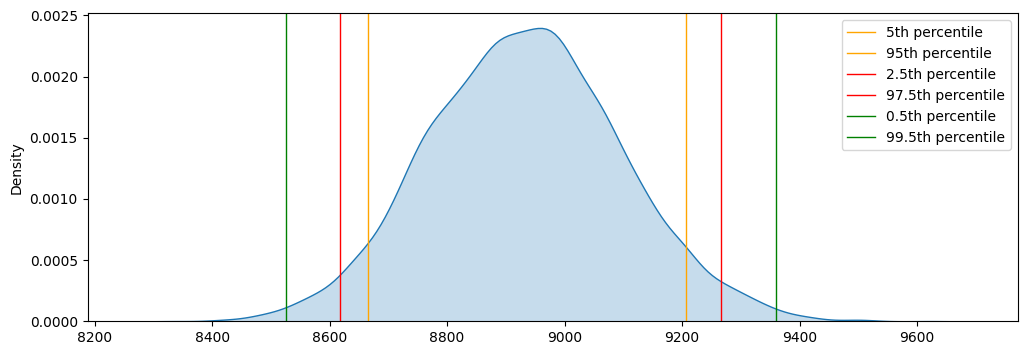

In [185]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(youth_purchase_mean,fill = True)
plt.axvline(x=np.percentile(youth_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

> ### CI analysis for 18-25 age-group

In [186]:
# Creating a Samples of size 1000 and computing means through bootstraping

young_df=df.loc[df['Age']=='18-25']['Purchase']
young_df.mean()

9169.663606261289

In [187]:
young_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(young_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    young_purchase_mean.append(bootstraped_mean)

In [188]:
# Calculating CI at 90%,95% and 99% for sample of size 1000

CI_young_90=np.percentile(young_purchase_mean,[5,95])
CI_young_95=np.percentile(young_purchase_mean,[2.5,97.5])
CI_young_99=np.percentile(young_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_young_90[0],2)} - {np.round(CI_young_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_young_95[0],2)} - {np.round(CI_young_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_young_99[0],2)} - {np.round(CI_young_99[1],2)}')

CI at 90% for sample of size 1000: 8912.32 - 9434.96
CI at 95% for sample of size 1000: 8862.3 - 9484.76
CI at 99% for sample of size 1000: 8780.66 - 9588.82


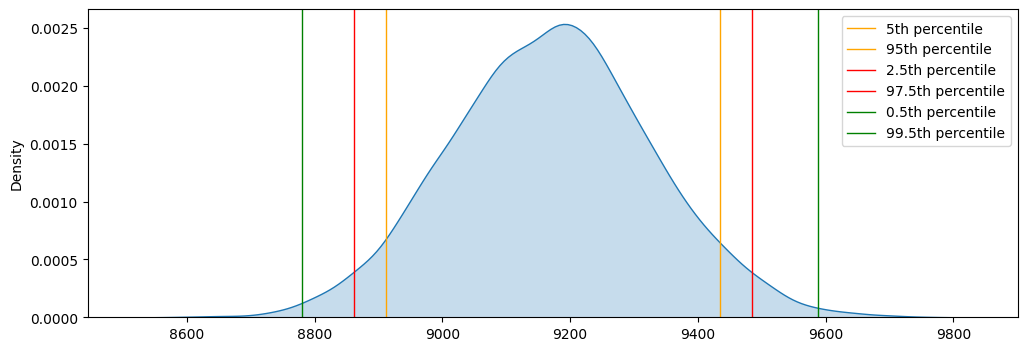

In [190]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(young_purchase_mean,fill =True)
plt.axvline(x=np.percentile(young_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

> ### CI analysis for 26-35 age-group

In [191]:
#Creating a Samples of size 1000 and computing means through bootstraping

adult_df=df.loc[df['Age']=='26-35']['Purchase']
adult_df.mean()

9252.690632869888

In [192]:
adult_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(adult_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    adult_purchase_mean.append(bootstraped_mean)

In [193]:
#Calculating CI at 90%,95% and 99% for samples of size 1000

CI_adult_90=np.percentile(adult_purchase_mean,[5,95])
CI_adult_95=np.percentile(adult_purchase_mean,[2.5,97.5])
CI_adult_99=np.percentile(adult_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_adult_90[0],2)} - {np.round(CI_adult_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_adult_95[0],2)} - {np.round(CI_adult_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_adult_99[0],2)} - {np.round(CI_adult_99[1],2)}')

CI at 90% for sample of size 1000: 8986.17 - 9512.12
CI at 95% for sample of size 1000: 8941.18 - 9563.68
CI at 99% for sample of size 1000: 8856.76 - 9652.05


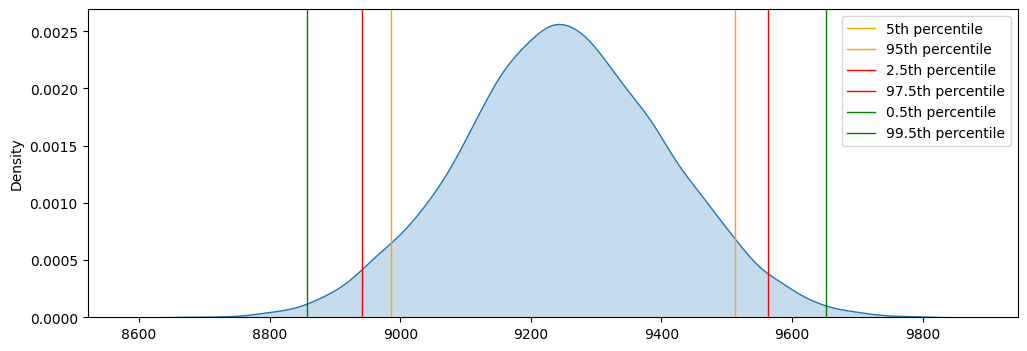

In [194]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(adult_purchase_mean,fill =True)
plt.axvline(x=np.percentile(adult_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

> ### CI analysis for 36-45 age-group

In [195]:
#Creating a Samples of size 1000 and computing means through bootstraping

midage_df=df.loc[df['Age']=='36-45']['Purchase']
midage_df.mean()

9331.350694917874

In [196]:
midage_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midage_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midage_purchase_mean.append(bootstraped_mean)

In [197]:
#Calculating CI at 90%,95% and 99% for samples of size 1000

CI_midage_90=np.percentile(midage_purchase_mean,[5,95])
CI_midage_95=np.percentile(midage_purchase_mean,[2.5,97.5])
CI_midage_99=np.percentile(midage_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midage_90[0],2)} - {np.round(CI_midage_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midage_95[0],2)} - {np.round(CI_midage_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midage_99[0],2)} - {np.round(CI_midage_99[1],2)}')

CI at 90% for sample of size 1000: 9075.46 - 9597.44
CI at 95% for sample of size 1000: 9024.97 - 9646.08
CI at 99% for sample of size 1000: 8924.76 - 9748.43


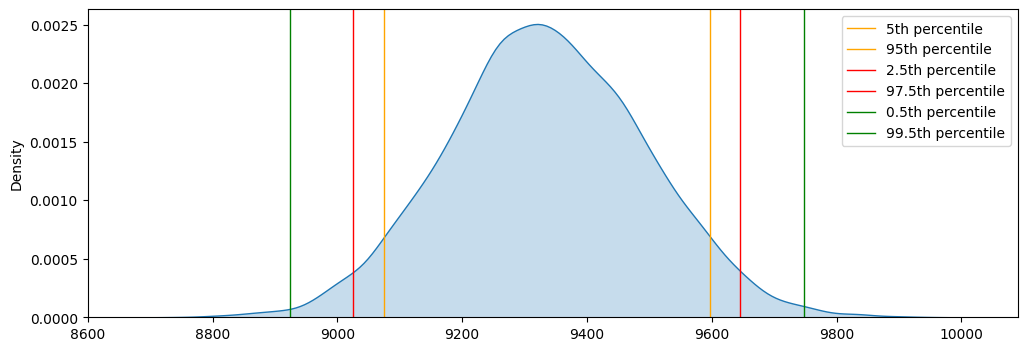

In [199]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(midage_purchase_mean,fill =True)
plt.axvline(x=np.percentile(midage_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()


> ### CI analysis for 46-50 Age-group

In [200]:
#Creating a Samples of size 1000 and computing means through bootstraping

midlife_df=df.loc[df['Age']=='46-50']['Purchase']
midlife_df.mean()

9208.625697468327

In [201]:
midlife_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midlife_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midlife_purchase_mean.append(bootstraped_mean)

In [202]:
#Calculating CI at 90%,95% and 99% for samples of size 1000

CI_midlife_90=np.percentile(midlife_purchase_mean,[5,95])
CI_midlife_95=np.percentile(midlife_purchase_mean,[2.5,97.5])
CI_midlife_99=np.percentile(midlife_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midlife_90[0],2)} - {np.round(CI_midlife_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midlife_95[0],2)} - {np.round(CI_midlife_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midlife_99[0],2)} - {np.round(CI_midlife_99[1],2)}')

CI at 90% for sample of size 1000: 8951.1 - 9468.71
CI at 95% for sample of size 1000: 8903.31 - 9516.68
CI at 99% for sample of size 1000: 8807.78 - 9617.43


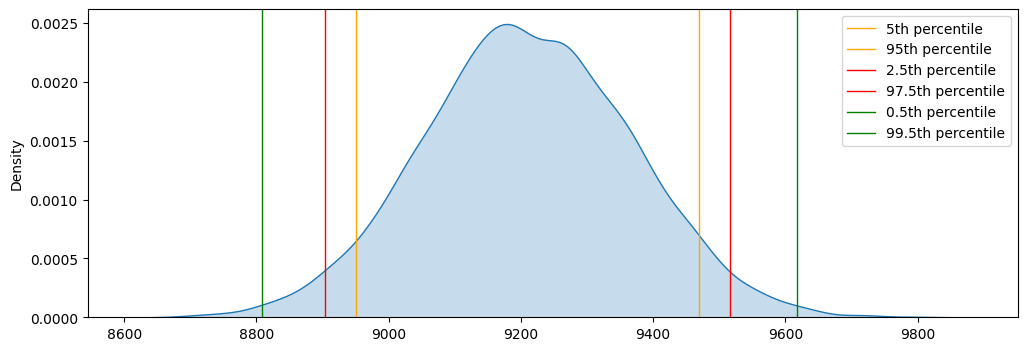

In [203]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(midlife_purchase_mean,fill = True)
plt.axvline(x=np.percentile(midlife_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

> ### CI analysis for 51-55 age-group¶


In [204]:
#Creating a Samples of size 1000 and computing means through bootstraping

old_df=df.loc[df['Age']=='51-55']['Purchase']
old_df.mean()

9534.808030960236

In [205]:
old_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(old_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    old_purchase_mean.append(bootstraped_mean)

In [206]:
#Calculating CI at 90%,95% and 99% for samples of size 1000

CI_old_90=np.percentile(old_purchase_mean,[5,95])
CI_old_95=np.percentile(old_purchase_mean,[2.5,97.5])
CI_old_99=np.percentile(old_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_old_90[0],2)} - {np.round(CI_old_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_old_95[0],2)} - {np.round(CI_old_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_old_99[0],2)} - {np.round(CI_old_99[1],2)}')

CI at 90% for sample of size 1000: 9273.63 - 9803.47
CI at 95% for sample of size 1000: 9223.08 - 9853.78
CI at 99% for sample of size 1000: 9110.85 - 9964.39


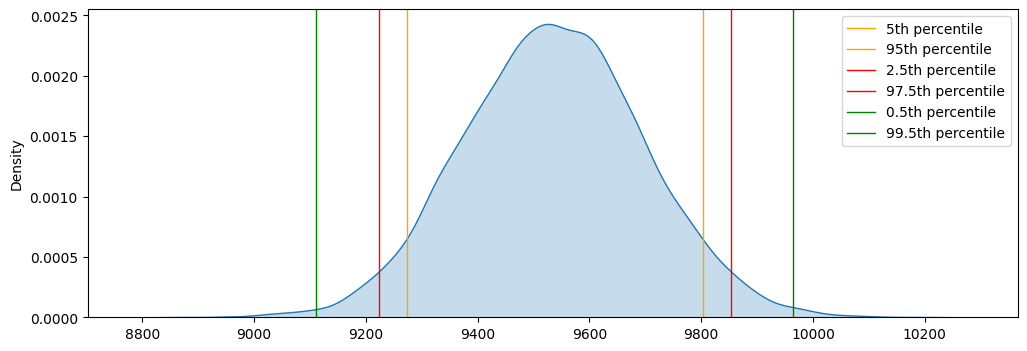

In [207]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(old_purchase_mean,fill = True)
plt.axvline(x=np.percentile(old_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

> ### CI analysis for 55+ age-group¶


In [208]:
#Creating a Samples of size 1000 and computing means through bootstraping

senior_df=df.loc[df['Age']=='55+']['Purchase']
senior_df.mean()

9336.280459449405

In [209]:
senior_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(senior_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    senior_purchase_mean.append(bootstraped_mean)

In [211]:
#Calculating CI at 90%,95% and 99% for samples of size 1000

CI_senior_90=np.percentile(senior_purchase_mean,[5,95])
CI_senior_95=np.percentile(senior_purchase_mean,[2.5,97.5])
CI_senior_99=np.percentile(senior_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_senior_90[0],2)} - {np.round(CI_senior_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_senior_95[0],2)} - {np.round(CI_senior_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_senior_99[0],2)} - {np.round(CI_senior_99[1],2)}')

CI at 90% for sample of size 1000: 9079.06 - 9598.93
CI at 95% for sample of size 1000: 9026.1 - 9652.08
CI at 99% for sample of size 1000: 8943.11 - 9745.41


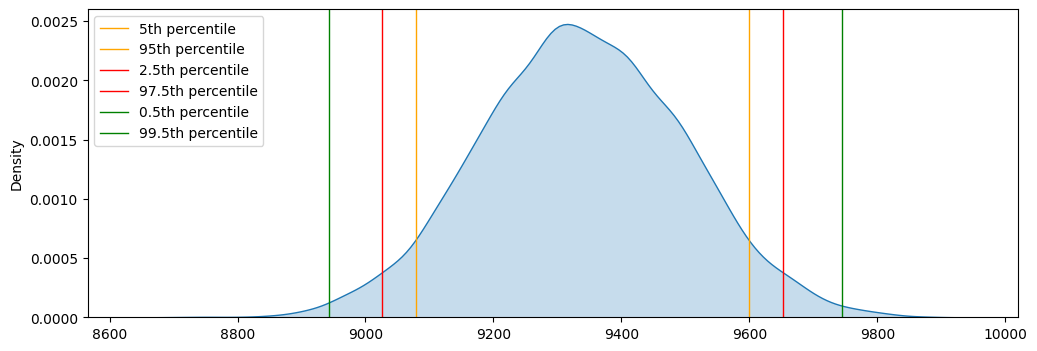

In [212]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,4))
sns.kdeplot(senior_purchase_mean,fill =True)
plt.axvline(x=np.percentile(senior_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

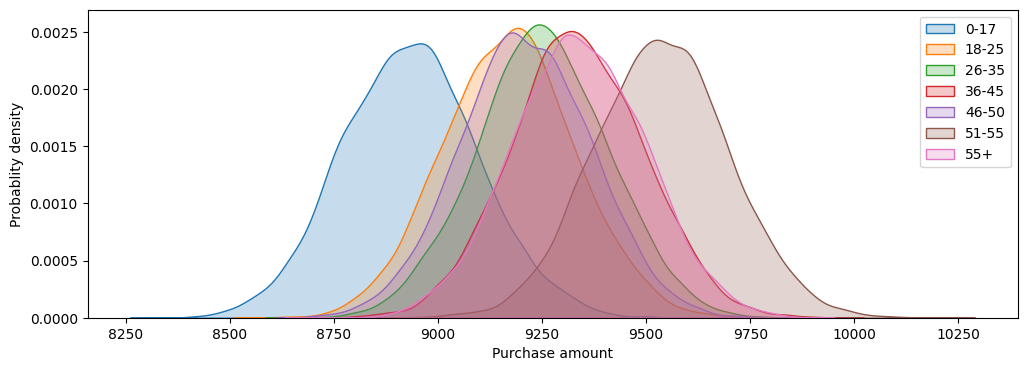

In [213]:
# Conclusion:
sample_means = [youth_purchase_mean, young_purchase_mean, adult_purchase_mean,
                midage_purchase_mean, midlife_purchase_mean, old_purchase_mean,
                senior_purchase_mean]

labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(12,4))
for i in range(len(labels)):
    sns.kdeplot(sample_means[i],fill=True,label=labels[i])
plt.xlabel('Purchase amount')
plt.ylabel('Probablity density')
plt.legend()
plt.show()

Inference: 

* The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.

## Distribution of Purchase across Product_Category,Occupation,City_Category,Stay_In_Current_City_Years

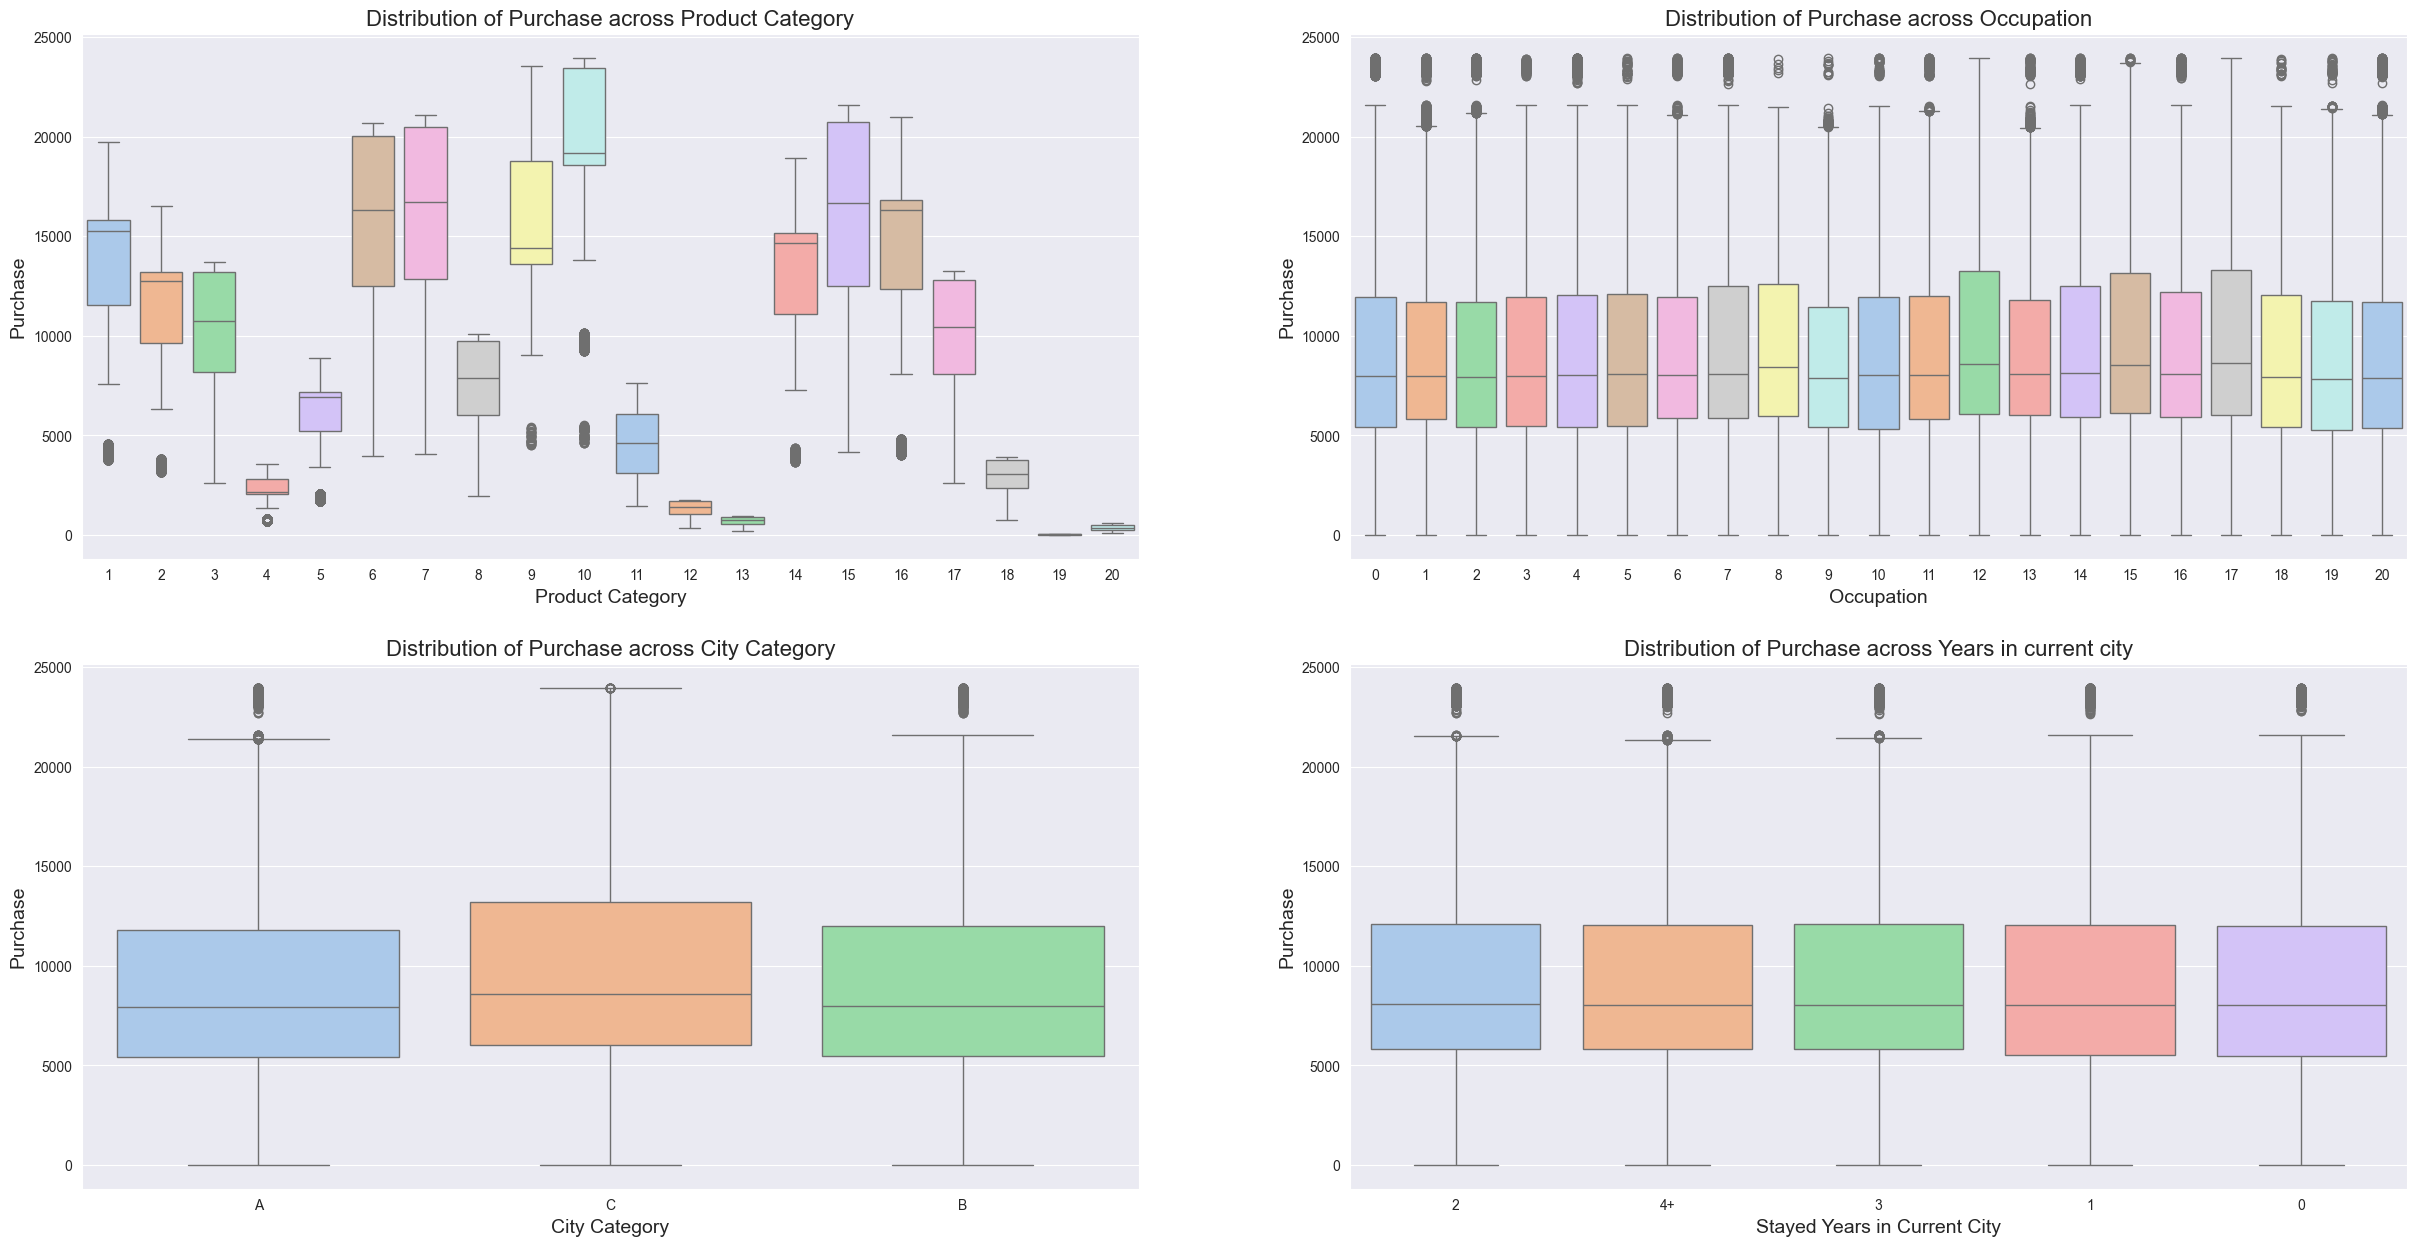

In [217]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,15))

#Box plot for product category:
plt.subplot(221)
sns.boxplot(data=df,x='Product_Category',y='Purchase', palette='pastel')
plt.xlabel('Product Category',fontdict=dict(fontsize=14))
plt.ylabel('Purchase',fontdict=dict(fontsize=14))
plt.title('Distribution of Purchase across Product Category', fontsize=16)


#Box plot for Occupation
plt.subplot(222)
sns.boxplot(data=df,x='Occupation',y='Purchase', palette='pastel')
plt.xlabel('Occupation',fontdict=dict(fontsize=14))
plt.ylabel('Purchase',fontdict=dict(fontsize=14))
plt.title('Distribution of Purchase across Occupation', fontsize=16)

#Boxplot for city category
plt.subplot(223)
sns.boxplot(data=df,x='City_Category',y='Purchase', palette='pastel')
plt.xlabel('City Category',fontdict=dict(fontsize=14))
plt.ylabel('Purchase',fontdict=dict(fontsize=14))
plt.title('Distribution of Purchase across City Category', fontsize=16)


#Boxplot for years in current city
plt.subplot(224)
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase', palette='pastel')
plt.xlabel('Stayed Years in Current City',fontdict=dict(fontsize=14))
plt.ylabel('Purchase',fontdict=dict(fontsize=14))
plt.title('Distribution of Purchase across Years in current city', fontsize=16)

plt.show()

## Distribution of top 3 product category across Gender and Marital Status

In [226]:
top3_product_category = df['Product_Category'].value_counts().index[:3]
top3_df = df.loc[df['Product_Category'].isin(top3_product_category)]

In [227]:
df.loc[df['Product_Category'].isin(top3_product_category)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
...,...,...,...,...,...,...,...,...,...,...
545910,1006040,P00184342,M,26-35,6,B,2,Unmarried,8,9855
545911,1006040,P00193142,M,26-35,6,B,2,Unmarried,5,1962
545912,1006040,P00029842,M,26-35,6,B,2,Unmarried,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,Unmarried,5,7159


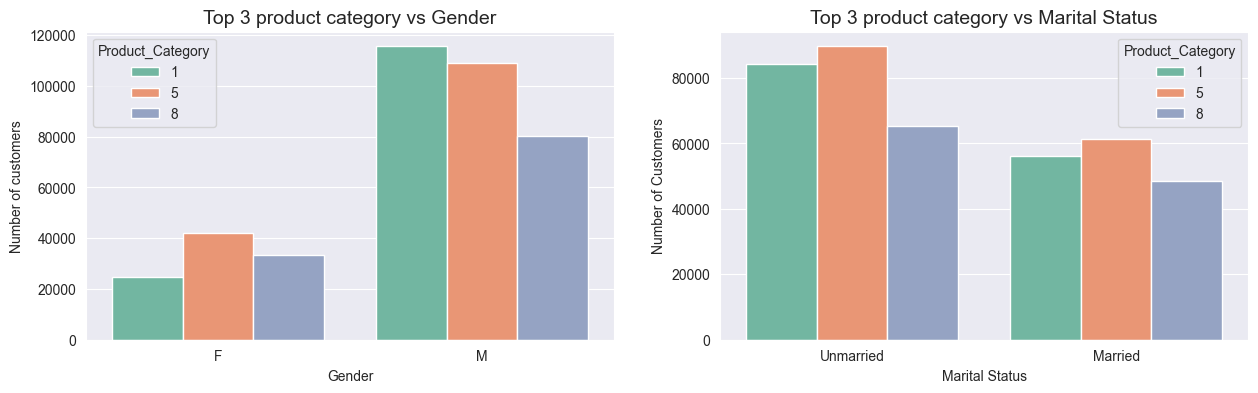

In [228]:
# Countplot for top 3 product category vs Gender
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.countplot(data = top3_df,x = 'Gender',hue = 'Product_Category', palette='Set2')
plt.title('Top 3 product category vs Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of customers')

#Countplot for top 3 product category vs Martial Status
plt.subplot(122)
sns.countplot(data=top3_df,x='Marital_Status',hue='Product_Category',palette='Set2')
plt.title('Top 3 product category vs Marital Status', fontsize=14)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

plt.show()

# Insights

* At Walmart, 75.3% of transactions are attributed to male customers, while 24.7% of transactions are attributed to female customers.
* With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases.
* This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.
* Inter Quartile Range for male customers :5863.0-12454.0
* Median purchases for male customers: 8098.0
* Inter Quartile Range for female customer:5433.0-11400.0
* Median purchases for female customers: 7914.0
* CI for male customers at 95% for sample size of 1000: 9122.77 - 9750.98
* CI for female customers at 95% for sample size of 1000: 8437.86 - 9029.25
* Out of the total transactions, 59% are carried out by unmarried customers, while the remaining 41% are attributed to married customers.
* The confidence intervals for married and unmarried customers overlap, suggesting that both male and female customers spend a similar amount per transaction. This means that the spending behavior of married and unmarried customers is alike.
* The spending behavior of both married and unmarried customers is consistent, as they both spend nearly the same amount per transaction. This is notably evident from the boxplot analysis, where the interquartile range and median purchases for both groups remain identical.
* CI for married customers at 95% for sample size of 1000: 8956.45 - 9582.07
* CI for unmarried customers at 95% for sample size of 1000: 8951.62 - 9572.98
* Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.
* The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.
* Purchase distribution of customers exhibits positive skewness, with a pronounced tail extending towards the higher values on the right side.
* Among Walmart's customers, a notable 27.4% exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
* The majority of customers fall under Occupation category 4.
* Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
* The majority of customers reside in a single city for a duration of one year.
* Within Walmart, product categories 13, 19, and 20 record the lowest spending per transaction among customers.
* Among Walmart customers, product categories 6, 7, and 15 stand out as the most favored, evidenced by their higher spending per transaction.
* Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.
* Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.
* Both unmarried and married customers at Walmart exhibit a shared preference for product category 5 when making their shopping choices.

## Genereal Insights:



*   APPROX 75 % OF CUSTOMERS IS OF MALE AND 25% CUSTOMERS ARE  FEMALE

*   APPROX 80% OF THE CUSTOMERS AGE IS BETWEEN 18-50 (2% : 0-17, 18% :18-25, 19% :36-45,40%: 26-35)

*   TOTAL OF 20 PRODUCT CATEGORIES ARE THERE.

*  THERE ARE 20 DIFFERENT TYPES OF OCCUPATIONS IN THE CITY.

*   THERE ARE MORE MALE CUSTOMER THAN FEMALES
*  APPROX ~ 35% STAYING IN CITY FROM 1 YEAR, 18% FROM 2 YEAR, 17% FROM 3 YEAR

*   60 % ARE SINGLE AND 40 % ARE MARRIED

*   26 % FROM CITY A, 42 % FROM CITY B, 31 % FROM CITY C

*  AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION MALE CUSTOMERS IS 925344.40.

*  AVERAGE AMOUNT SPEND PER TRANSACTION OF ALL 50 MILLION FEMALE CUSTOMERS IS 712024.39



*  CONFIDENCE INTERVAL BY GENDER(USING CENTRAL LIMIT THEOREM):

1. AT 95 % CONFIDENCE LEVEL ,WE CAN CONCLUDE THAT WE ARE 95% CONFIDENET THAT AVERAGE AMOUNT SPENT BY THE 50 MILLION MALE CUSTOMERS WILL LIE IN THE RANGE OF ([9122.47 ,  9756.8])
2. AND THE TRUE AVERAGE AMOUNT SPENT BY THE 50 MILLION FEMALE CUSTOMERS WILL LIE IN THE RANGE OF ([8434.12, 9030.12])

* CONFIDENCE INTERVAL BY MARITAL STATUS AT 95% CONFIDENCE INTERVAL:
1. AT 95 % CONFIDENCE LEVEL ,WE CAN CONCLUDE THAT WE ARE 95% CONFIDENET THAT AVERAGE AMOUNT SPENT BY THE MARRIED CUSTOMERS WILL FALL/LIE IN THE RANGE OF ([8950.26 , 9577.67])
2. AND THE TRUE AVERAGE AMOUNT SPENT BY THE SINGLE CUSTOMERS WILL LIE IN THE RANGE OF ([8959.16,9578.89])


# General RECOMMENDATAION:



*   GENDER:

COMPANY NEEDS TO FOCUS MORE ON THE FEMALE CUSTOMER (AS WOMEN SPENT LESS MAN)AND PRIORITIZE RETAINING AND ATTRACTING MORE MALE CUSTOMERS.

*   CUSOTMER AGE GROUP:

CUSTOMER WHO FALL UNDER THE AGE CATEGORY OF 18-50 ARE MORE LIKELY TO SPEND MONEY THAN OTHERS.SO NEEDS TO FOCUS ON THE ACCESSING MORE CUSTOMERS WHO ALL FALL UNDER THIS GROUP.

* CITY CATEGORY:

AS FROM THE ABOVE INSIGHT WE KNOW THAT MOST MOST OF CUSTOMER BELONG TO CITY OF CATEGORY C WHO SPENT MOST OF THE MONEY THAN OTHERS.

SO IF WE INCREASE THE SALE IN CITY C IT WILL BE VERY BENEFICCIAL FOR THE COMPANY GROWTH AND EXPANDING THEIR NETWORK.


*   MARITAL STATUS:

AS UNMARRIED CUSTOMERS/ SINGLE SPEND MOST AMOUNT OF MONEY THAN THE MARRIED CUSOTMERS.SO COMPANY NEED TO FOCUS ON ACQUISATION OF SINGLES CUSTOMERS


*   PRODUCT CATEGORY:

FROM THE ABOVE OBSERVATION WE CAN CONCLUDE THAT CUSTOMER SPEND MOST OF THE MONEY IN PRODUCT CATEGORY 10(MASKED). SO WE NEED TO FOCUS ON THE PRODUCT CATEGORY OF 10 TO GET MORE PROFIT FOR THE COMPANY GROWTH.



# Recommendations

> * Actionable Insight: With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases. This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.

* Recommendations:

* For Black Friday sales, make sure the store provides a wide selection of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products to household essentials and beyond.
* Actively seek feedback from female customers to understand their preferences, concerns, and suggestions. Use this feedback to make improvements and adjustments that cater to their needs.
* For Black Friday sales, introduce loyalty programs tailored to female customers, featuring exclusive perks like discounts, early access to sales, and unique rewards. This approach can enhance engagement and attract female shoppers.
* Enhance the online shopping experience for female customers. Ensure that the website is user-friendly, offers detailed product information, and provides convenient options for delivery and returns.
* Collaborate with brands or influencers that resonate with female customers. This can help expand Walmart's reach and attract new female customers.

> * Actionable Insight: Confidence intervals of average married and unmarried spending overlapping.

* Recommendations:

* The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
* Instead of allocating resources and time to differentiate between "Married" and "Unmarried" subcategories, Walmart could enhance efficiency by treating both categories as unified. This approach is likely to yield more effective results.
* Actionable Insight:Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.

* Recommendations:

* Designate safe and fun play areas within the store where children can engage in age-appropriate activities. This can provide parents with a convenient shopping experience while keeping kids entertained.
* Create dedicated zones with comfortable seating and Wi-Fi for teenagers. This can become a place where they can socialize, study, or relax while their parents shop.
* Stock a wide range of products that appeal to kids and teenagers, including toys, clothes, books, electronics, and school supplies. Ensure that the products are both engaging and age-appropriate.
* Offer educational toys, craft kits, and learning materials that promote creativity and skill development among children.
* Introduce special discounts and offers exclusively for the 0-17 age group, encouraging both children and parents to choose Walmart for their shopping needs.